In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, accuracy_score
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

# ----設定繪圖-------
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft Dexter'] 
plt.rcParams['axes.unicode_minus'] = False  
from matplotlib.font_manager import FontProperties 
import seaborn as sns 
myfont=FontProperties(fname='Microsoft JhengHei',size=14) 
sns.set(font=myfont.get_family()) 
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft Dexter']}) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = None

#------時間------
from datetime import datetime,timedelta
from datetime import datetime as dt
import time

In [2]:
names = ['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'L1D_RH', 'L1D_AH', 'L1D_re', 'L1D_fbCNT',
       'L1D_nCR', 'L1D_nMR', 'L1D_nTR', 'L1D_nconcompla', 'L1D_nconcompli',
       'L1D_nmatcompla', 'L1D_nmatcompli', 'L1D_nteccompla', 'L1D_accLIKE',
       'L1D_proLIKE', 'L1D_accDLIKE', 'L1D_proDLIKE', 'L1D_FavorCNT',
       'L1D_BlockCNT', 'L1D_AddFavorCNT', 'L1D_AddBlockCNT', 'L1D_star',
       'L1D_isIntCNT', 'L1D_LVdiffCNT', 'L1D_MGMLead', 'L1D_MGMRes',
       'L1D_MGMDemo', 'L1D_MGMDeal', 'L1D_conUUCCNT', 'L1D_conSOUCNT',
       'L1D_conSERCNT', 'L1D_conTWBCNT', 'L1D_conOTHCNT', 'L1D_conLigCNT',
       'L1D_conMedCNT', 'L1D_conTanCNT', 'L1D_conDarCNT', 'L1D_conEx01CNT',
       'L1D_conEx03CNT', 'L1D_conEx12CNT', 'L1D_conEx24CNT', 'L1D_conage30CNT',
       'L1D_conage40CNT', 'L1D_conage50CNT', 'L1D_conage60CNT',
       'L1D_conage61CNT', 'L1D_conMCNT', 'L1D_conFCNT', 'L1D_helpCNT',
       'L1D_helpCNTmax', 'L1D_help3mCNT', 'L1D_help3mCNTmax', 'L1D_helpITCNT',
       'L1D_helpITCNTmax', 'L1D_helpIT3mCNT', 'L1D_helpIT3mCNTmax',
       'L1D_helpIiCNT', 'L1D_helpIiCNTmax', 'L1D_helpIi3mCNT',
       'L1D_helpIi3mCNTmax', 'L1D_helpMaCNT', 'L1D_helpMaCNTmax',
       'L1D_helpMa3mCNT', 'L1D_helpMa3mCNTmax', 'L1D_helpTeCNT',
       'L1D_helpTeCNTmax', 'L1D_helpTe3mCNT', 'L1D_helpTe3mCNTmax',
       'L1D_helpconCNT', 'L1D_helpconCNTmax', 'L1D_helpcon3mCNT',
       'L1D_helpcon3mCNTmax', 'L3D_RH', 'L3D_AH', 'L3D_re', 'L3D_fbCNT',
       'L3D_nCR', 'L3D_nMR', 'L3D_nTR', 'L3D_nconcompla', 'L3D_nconcompli',
       'L3D_nmatcompla', 'L3D_nmatcompli', 'L3D_nteccompla', 'L3D_accLIKE',
       'L3D_proLIKE', 'L3D_accDLIKE', 'L3D_proDLIKE', 'L3D_FavorCNT',
       'L3D_BlockCNT', 'L3D_AddFavorCNT', 'L3D_AddBlockCNT', 'L3D_star',
       'L3D_isIntCNT', 'L3D_LVdiffCNT', 'L3D_MGMLead', 'L3D_MGMRes',
       'L3D_MGMDemo', 'L3D_MGMDeal', 'L3D_conUUCCNT', 'L3D_conSOUCNT',
       'L3D_conSERCNT', 'L3D_conTWBCNT', 'L3D_conOTHCNT', 'L3D_conLigCNT',
       'L3D_conMedCNT', 'L3D_conTanCNT', 'L3D_conDarCNT', 'L3D_conEx01CNT',
       'L3D_conEx03CNT', 'L3D_conEx12CNT', 'L3D_conEx24CNT', 'L3D_conage30CNT',
       'L3D_conage40CNT', 'L3D_conage50CNT', 'L3D_conage60CNT',
       'L3D_conage61CNT', 'L3D_conMCNT', 'L3D_conFCNT', 'L3D_helpCNT',
       'L3D_helpCNTmax', 'L3D_help3mCNT', 'L3D_help3mCNTmax', 'L3D_helpITCNT',
       'L3D_helpITCNTmax', 'L3D_helpIT3mCNT', 'L3D_helpIT3mCNTmax',
       'L3D_helpIiCNT', 'L3D_helpIiCNTmax', 'L3D_helpIi3mCNT',
       'L3D_helpIi3mCNTmax', 'L3D_helpMaCNT', 'L3D_helpMaCNTmax',
       'L3D_helpMa3mCNT', 'L3D_helpMa3mCNTmax', 'L3D_helpTeCNT',
       'L3D_helpTeCNTmax', 'L3D_helpTe3mCNT', 'L3D_helpTe3mCNTmax',
       'L3D_helpconCNT', 'L3D_helpconCNTmax', 'L3D_helpcon3mCNT',
       'L3D_helpcon3mCNTmax', 'L7D_RH', 'L7D_AH', 'L7D_re', 'L7D_fbCNT',
       'L7D_nCR', 'L7D_nMR', 'L7D_nTR', 'L7D_nconcompla', 'L7D_nconcompli',
       'L7D_nmatcompla', 'L7D_nmatcompli', 'L7D_nteccompla', 'L7D_accLIKE',
       'L7D_proLIKE', 'L7D_accDLIKE', 'L7D_proDLIKE', 'L7D_FavorCNT',
       'L7D_BlockCNT', 'L7D_AddFavorCNT', 'L7D_AddBlockCNT', 'L7D_star',
       'L7D_isIntCNT', 'L7D_LVdiffCNT', 'L7D_MGMLead', 'L7D_MGMRes',
       'L7D_MGMDemo', 'L7D_MGMDeal', 'L7D_conUUCCNT', 'L7D_conSOUCNT',
       'L7D_conSERCNT', 'L7D_conTWBCNT', 'L7D_conOTHCNT', 'L7D_conLigCNT',
       'L7D_conMedCNT', 'L7D_conTanCNT', 'L7D_conDarCNT', 'L7D_conEx01CNT',
       'L7D_conEx03CNT', 'L7D_conEx12CNT', 'L7D_conEx24CNT', 'L7D_conage30CNT',
       'L7D_conage40CNT', 'L7D_conage50CNT', 'L7D_conage60CNT',
       'L7D_conage61CNT', 'L7D_conMCNT', 'L7D_conFCNT', 'L7D_helpCNT',
       'L7D_helpCNTmax', 'L7D_help3mCNT', 'L7D_help3mCNTmax', 'L7D_helpITCNT',
       'L7D_helpITCNTmax', 'L7D_helpIT3mCNT', 'L7D_helpIT3mCNTmax',
       'L7D_helpIiCNT', 'L7D_helpIiCNTmax', 'L7D_helpIi3mCNT',
       'L7D_helpIi3mCNTmax', 'L7D_helpMaCNT', 'L7D_helpMaCNTmax',
       'L7D_helpMa3mCNT', 'L7D_helpMa3mCNTmax', 'L7D_helpTeCNT',
       'L7D_helpTeCNTmax', 'L7D_helpTe3mCNT', 'L7D_helpTe3mCNTmax',
       'L7D_helpconCNT', 'L7D_helpconCNTmax', 'L7D_helpcon3mCNT',
       'L7D_helpcon3mCNTmax', 'L14D_RH', 'L14D_AH', 'L14D_re', 'L14D_fbCNT',
       'L14D_nCR', 'L14D_nMR', 'L14D_nTR', 'L14D_nconcompla',
       'L14D_nconcompli', 'L14D_nmatcompla', 'L14D_nmatcompli',
       'L14D_nteccompla', 'L14D_accLIKE', 'L14D_proLIKE', 'L14D_accDLIKE',
       'L14D_proDLIKE', 'L14D_FavorCNT', 'L14D_BlockCNT', 'L14D_AddFavorCNT',
       'L14D_AddBlockCNT', 'L14D_star', 'L14D_isIntCNT', 'L14D_LVdiffCNT',
       'L14D_MGMLead', 'L14D_MGMRes', 'L14D_MGMDemo', 'L14D_MGMDeal',
       'L14D_conUUCCNT', 'L14D_conSOUCNT', 'L14D_conSERCNT', 'L14D_conTWBCNT',
       'L14D_conOTHCNT', 'L14D_conLigCNT', 'L14D_conMedCNT', 'L14D_conTanCNT',
       'L14D_conDarCNT', 'L14D_conEx01CNT', 'L14D_conEx03CNT',
       'L14D_conEx12CNT', 'L14D_conEx24CNT', 'L14D_conage30CNT',
       'L14D_conage40CNT', 'L14D_conage50CNT', 'L14D_conage60CNT',
       'L14D_conage61CNT', 'L14D_conMCNT', 'L14D_conFCNT', 'L14D_helpCNT',
       'L14D_helpCNTmax', 'L14D_help3mCNT', 'L14D_help3mCNTmax',
       'L14D_helpITCNT', 'L14D_helpITCNTmax', 'L14D_helpIT3mCNT',
       'L14D_helpIT3mCNTmax', 'L14D_helpIiCNT', 'L14D_helpIiCNTmax',
       'L14D_helpIi3mCNT', 'L14D_helpIi3mCNTmax', 'L14D_helpMaCNT',
       'L14D_helpMaCNTmax', 'L14D_helpMa3mCNT', 'L14D_helpMa3mCNTmax',
       'L14D_helpTeCNT', 'L14D_helpTeCNTmax', 'L14D_helpTe3mCNT',
       'L14D_helpTe3mCNTmax', 'L14D_helpconCNT', 'L14D_helpconCNTmax',
       'L14D_helpcon3mCNT', 'L14D_helpcon3mCNTmax', 'FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']

In [3]:
df = pd.read_csv('D:/karma5.0/0121/datasets41to60.csv',names=names)

In [4]:
dff_all = df[['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax','FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']]

# 特徵工程 Part2 Feature Engineering (承接下方之Part1)

In [5]:
dff_all['MBA_technical'] = dff_all['MBA_technical'].fillna(0)
dff_all['MBA_customer'] = dff_all['MBA_customer'].fillna(0)
dff_all['MBA_Scheduling'] = dff_all['MBA_Scheduling'].fillna(0)
dff_all['MBA_Class'] = dff_all['MBA_Class'].fillna(0)
dff_all['MBA_Service'] = dff_all['MBA_Service'].fillna(0)
dff_all['MBA_total']=dff_all['MBA_Class']+dff_all['MBA_Scheduling']+dff_all['MBA_Service']+dff_all['MBA_customer']+dff_all['MBA_technical']
dff_all['mbadate_First']=pd.to_datetime(dff_all['mbadate_First']).dt.date
dff_all['mbadate_New']=pd.to_datetime(dff_all['mbadate_New']).dt.date
dff_all['FDsellingdate']=pd.to_datetime(dff_all['FDsellingdate']).dt.date
dff_all['mbdate']=pd.to_datetime(dff_all['mbdate']).dt.date
dff_all['mbadiff'] = dff_all['mbadate_New']-dff_all['mbadate_First']
dff_all['mbtime'] = dff_all['mbdate']-dff_all['FDsellingdate']
dff_all['mbaFtoSelltime'] = dff_all['mbadate_First']-dff_all['FDsellingdate']
dff_all['mbaNtoSelltime'] = dff_all['mbadate_New']-dff_all['FDsellingdate']
dff_all['mbFdiff'] = dff_all['mbdate']-dff_all['mbadate_First']
dff_all['mbNdiff'] = dff_all['mbdate']-dff_all['mbadate_New']
dff_all = dff_all.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
dff_all = dff_all.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
dff_all = dff_all.drop(['mbadate_First','mbadate_New','FDsellingdate','mbdate',],axis=1)
dff_all = dff_all.drop(['WarrantyPeriod'],axis=1)
dff_all = dff_all.drop(['product_sdate'],axis=1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [6]:
df_test = dff_all

In [7]:
df_test['mbadiff'] = (df_test['mbadiff'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaFtoSelltime'] = (df_test['mbaFtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaNtoSelltime'] = (df_test['mbaNtoSelltime'] / np.timedelta64(1, 'D')).astype(float)

In [8]:
df_test['RH'] = df_test['RH'].fillna(df_test['RH'].median())
df_test['AH'] = df_test['AH'].fillna(df_test['AH'].median())
df_test['re'] = df_test['re'].fillna(df_test['re'].median())
df_test['fbCNT'] = df_test['fbCNT'].fillna(df_test['fbCNT'].median())
df_test['nCR'] = df_test['nCR'].fillna(df_test['nCR'].mean())
df_test['nMR'] = df_test['nMR'].fillna(df_test['nMR'].mean())
df_test['nTR'] = df_test['nTR'].fillna(df_test['nTR'].mean())
mean_nconcompla = df_test['nconcompla'].mean()
mean_nmatcompla = df_test['nmatcompla'].mean()
mean_nteccompla = df_test['nteccompla'].mean()
df_test['nconcompla'] = df_test['nconcompla'].fillna(mean_nconcompla)
df_test['nmatcompla'] = df_test['nmatcompla'].fillna(mean_nmatcompla)
df_test['nteccompla'] = df_test['nteccompla'].fillna(mean_nteccompla)
df_test['star'] = df_test['star'].fillna(5)
df_test = df_test[df_test['star']<15.0]
df_test['ALL_star'] = df_test['ALL_star'].fillna(4)
df_test = df_test[df_test['ALL_star']<100.0]
df_test['isIntCNT'] = df_test['isIntCNT'].fillna(1)
df_test['ALL_RH'] = df_test['ALL_RH'].fillna(df_test['ALL_RH'].median())
df_test['ALL_AH'] = df_test['ALL_AH'].fillna(df_test['ALL_AH'].median())
df_test['ALL_re'] = df_test['ALL_re'].fillna(df_test['ALL_re'].median())
df_test['ALL_fbCNT'] = df_test['ALL_fbCNT'].fillna(df_test['ALL_fbCNT'].median())
df_test['ALL_nCR'] = df_test['ALL_nCR'].fillna(df_test['ALL_nCR'].mean())
df_test['ALL_nMR'] = df_test['ALL_nMR'].fillna(df_test['ALL_nMR'].mean())
df_test['ALL_nTR'] = df_test['ALL_nTR'].fillna(df_test['ALL_nTR'].mean())
df_test['ALL_nconcompla'] = df_test['ALL_nconcompla'].fillna(df_test['ALL_nconcompla'].mean())
df_test['ALL_nmatcompla'] = df_test['ALL_nmatcompla'].fillna(df_test['ALL_nmatcompla'].mean())
df_test['ALL_nteccompla'] = df_test['ALL_nteccompla'].fillna(df_test['ALL_nteccompla'].mean())
df_test['ALL_isIntCNT'] = df_test['ALL_isIntCNT'].fillna(7)
print(df_test.shape)
df_test.info(verbose=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


(843300, 154)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 843300 entries, 0 to 843341
Data columns (total 154 columns):
DDwFD                  int64
contractsn             int64
DATE                   object
DuringMBA              int64
RH                     float64
AH                     float64
re                     float64
fbCNT                  float64
nCR                    float64
nMR                    float64
nTR                    float64
nconcompla             float64
nconcompli             float64
nmatcompla             float64
nmatcompli             float64
nteccompla             float64
accLIKE                float64
proLIKE                float64
accDLIKE               float64
proDLIKE               float64
FavorCNT               float64
BlockCNT               float64
AddFavorCNT            float64
AddBlockCNT            float64
star                   float64
isIntCNT               float64
LVdiffCNT              float64
MGMLead                float64
MGMRes       

In [9]:
df_test['MGM_total'] = df_test['MGMLead']+df_test['MGMRes']+df_test['MGMDemo']+df_test['MGMDeal']
df_test['ALL_MGM_total']= df_test['ALL_MGMLead']+df_test['ALL_MGMRes']+df_test['ALL_MGMDemo']+df_test['ALL_MGMDeal']
df_test['Like_total'] = df_test['accLIKE']+df_test['proLIKE']
df_test['ALL_Like_total'] = df_test['ALL_accLIKE']+df_test['ALL_proLIKE']
df_test['DLike_total'] = df_test['accDLIKE']+df_test['proDLIKE']
df_test['ALL_DLike_total'] = df_test['ALL_accDLIKE']+df_test['ALL_proDLIKE']
df_test['help_total'] = df_test['helpITCNT']+df_test['helpIiCNT']+df_test['helpTeCNT']+df_test['helpMaCNT']+df_test['helpconCNT']
df_test['ALL_help_total'] = df_test['ALL_helpITCNT']+df_test['ALL_helpIiCNT']+df_test['ALL_helpTeCNT']+df_test['ALL_helpMaCNT']+df_test['ALL_helpconCNT']
df_test['help_max_total'] = df_test['helpITCNTmax']+df_test['helpIiCNTmax']+df_test['helpTeCNTmax']+df_test['helpMaCNTmax']+df_test['helpconCNTmax']
df_test['ALL_help_max_total'] = df_test['ALL_helpITCNTmax']+df_test['ALL_helpIiCNTmax']+df_test['ALL_helpTeCNTmax']+df_test['ALL_helpMaCNTmax']+df_test['ALL_helpconCNTmax']
df_test['3mhelp_max_total'] = df_test['helpIT3mCNTmax']+df_test['helpIi3mCNTmax']+df_test['helpTe3mCNTmax']+df_test['helpMa3mCNTmax']+df_test['helpcon3mCNTmax']
df_test['ALL3m_help_max_total'] = df_test['ALL_helpIT3mCNTmax']+df_test['ALL_helpIi3mCNTmax']+df_test['ALL_helpTe3mCNTmax']+df_test['ALL_helpMa3mCNTmax']+df_test['ALL_helpcon3mCNTmax']

In [10]:
df_test = df_test.fillna(0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_t = df_test[[['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax','mb', 'mb_STV', 'mbaCNT',
       'MBA_total', 'mbadiff', 'mbtime', 'mbaFtoSelltime', 'mbaNtoSelltime',
       'mbFdiff', 'mbNdiff', 'MGM_total','Like_total',
       'DLike_total', 'help_total','help_max_total', 'ALL_help_max_total',
       '3mhelp_max_total', 'ALL3m_help_max_total']]

In [11]:
df_test[df_test['mb']==1].describe()

,DDwFD,contractsn,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nconcompli,nmatcompla,nmatcompli,nteccompla,accLIKE,proLIKE,accDLIKE,proDLIKE,FavorCNT,BlockCNT,AddFavorCNT,AddBlockCNT,star,isIntCNT,LVdiffCNT,MGMLead,MGMRes,MGMDemo,MGMDeal,conUUCCNT,conSOUCNT,conSERCNT,conTWBCNT,conOTHCNT,conLigCNT,conMedCNT,conTanCNT,conDarCNT,conEx01CNT,conEx03CNT,conEx12CNT,conEx24CNT,conage30CNT,conage40CNT,conage50CNT,conage60CNT,conage61CNT,conMCNT,conFCNT,helpCNT,helpCNTmax,help3mCNT,help3mCNTmax,helpITCNT,helpITCNTmax,helpIT3mCNT,helpIT3mCNTmax,helpIiCNT,helpIiCNTmax,helpIi3mCNT,helpIi3mCNTmax,helpMaCNT,helpMaCNTmax,helpMa3mCNT,helpMa3mCNTmax,helpTeCNT,helpTeCNTmax,helpTe3mCNT,helpTe3mCNTmax,helpconCNT,helpconCNTmax,helpcon3mCNT,helpcon3mCNTmax,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_LVdiffCNT,ALL_MGMLead,ALL_MGMRes,ALL_MGMDemo,ALL_MGMDeal,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_helpCNTmax,ALL_help3mCNT,ALL_help3mCNTmax,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax,ALL_helpIiCNT,ALL_helpIiCNTmax,ALL_helpIi3mCNT,ALL_helpIi3mCNTmax,ALL_helpMaCNT,ALL_helpMaCNTmax,ALL_helpMa3mCNT,ALL_helpMa3mCNTmax,ALL_helpTeCNT,ALL_helpTeCNTmax,ALL_helpTe3mCNT,ALL_helpTe3mCNTmax,ALL_helpconCNT,ALL_helpconCNTmax,ALL_helpcon3mCNT,ALL_helpcon3mCNTmax,mb,mb_STV,mbaCNT,MBA_total,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff,MGM_total,ALL_MGM_total,Like_total,ALL_Like_total,DLike_total,ALL_DLike_total,help_total,ALL_help_total,help_max_total,ALL_help_max_total,3mhelp_max_total,ALL3m_help_max_total
count,59432.000000,5.943200e+04,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.0,59432.0,59432.000000,59432.000000,59432.000000,59432,59432.000000,59432.000000,59432,59432,59432.000000,59432.000000,59432.000000,59432.000000,

In [12]:
df_test = df_test[df_test['mbaFtoSelltime']>=0.0]
df_test = df_test[df_test['mbaNtoSelltime']>=0.0]
print(df_test.shape)

(843261, 166)


In [13]:
df_sum = df_test[[
 'DuringMBA',
 'nCR',
 'nMR',
 'nTR',
 'star',
 'isIntCNT',
 'ALL_RH',
 'ALL_AH',
 'ALL_re',
 'ALL_fbCNT',
 'ALL_nCR',
 'ALL_nMR',
 'ALL_nTR',
 'ALL_nconcompla',
 'ALL_nteccompla',
 'ALL_FavorCNT',
 'ALL_BlockCNT',
 'ALL_AddFavorCNT',
 'ALL_AddBlockCNT',
 'ALL_star',
 'ALL_isIntCNT',
 'ALL_conUUCCNT',
 'ALL_conSOUCNT',
 'ALL_conSERCNT',
 'ALL_conTWBCNT',
 'ALL_conOTHCNT',
 'ALL_conLigCNT',
 'ALL_conMedCNT',
 'ALL_conTanCNT',
 'ALL_conDarCNT',
 'ALL_conEx01CNT',
 'ALL_conEx03CNT',
 'ALL_conEx12CNT',
 'ALL_conEx24CNT',
 'ALL_conage30CNT',
 'ALL_conage40CNT',
 'ALL_conage50CNT',
 'ALL_conage60CNT',
 'ALL_conage61CNT',
 'ALL_conMCNT',
 'ALL_conFCNT',
 'ALL_helpCNT',
 'mb',
 'mb_STV',
 'MBA_total',
 'mbadiff',
 'mbaFtoSelltime',
 'mbaNtoSelltime',
 'ALL_MGM_total',
 'ALL_Like_total',
 'ALL_DLike_total',
 'ALL_help_total',
 'ALL_help_max_total',
 'ALL3m_help_max_total']]
df_sum.shape

(843261, 54)

In [14]:
'''for i in df_test.columns:
    if 843300 not in df_test[str(i)].isnull().value_counts().tolist() and df_test[str(i)].isnull().value_counts().tolist()[0]>750000:
        print(df_test[str(i)].isnull().value_counts())'''

'for i in df_test.columns:\n    if 843300 not in df_test[str(i)].isnull().value_counts().tolist() and df_test[str(i)].isnull().value_counts().tolist()[0]>750000:\n        print(df_test[str(i)].isnull().value_counts())'

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


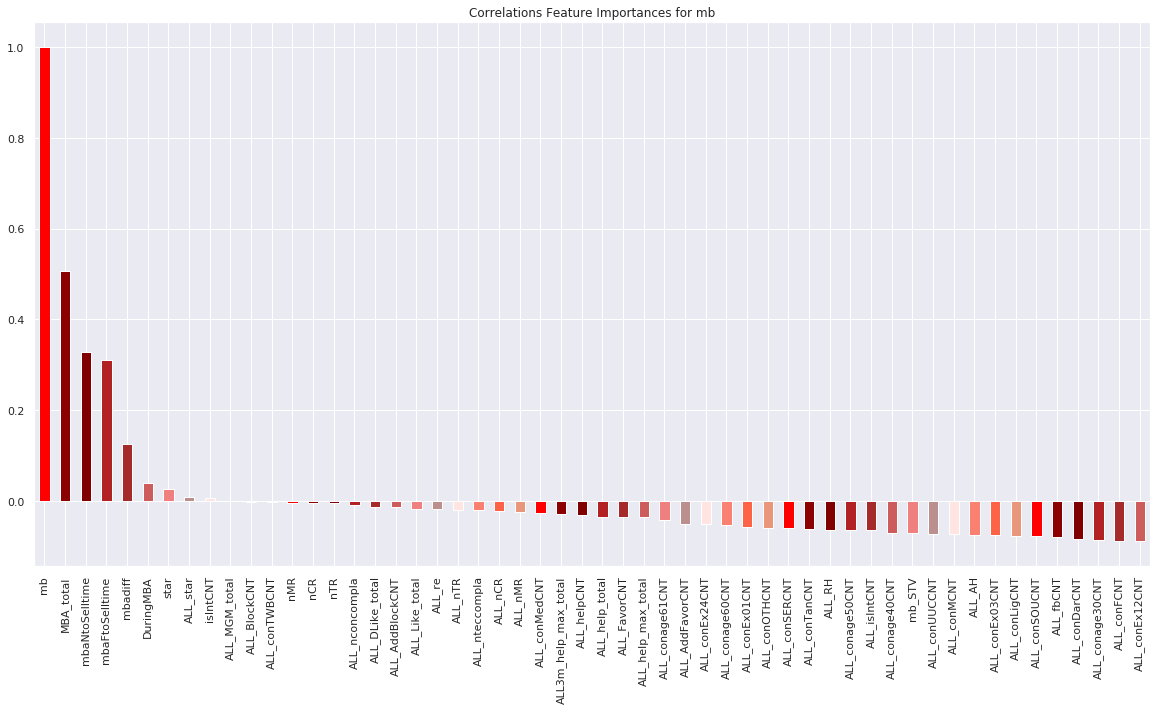

In [16]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_sum.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

# Modeling 
# (i)   異常檢測(Anomaly Detection) 
## Adv:合適於樣本類型差異大 Dis:非監督的分群方法,不會返回機率值
# (ii)  提升樹分類(Booasting Classtifier) on-going  
## Adv:監督學習的分類方法,有機率值 Dis:樣本類型差異大時或高維度,會overfitting
# (iii) 支援向量機(Support Vector Classtifier )  
## Adv: 監督學習的分類方法,有機率值 適合高維度 Dis:高筆數數據集效能較慢

In [310]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,cross_validate
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,f1_score,r2_score,recall_score,roc_auc_score,precision_recall_curve,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import scikitplot as skplt

# (i)異常檢測 : 
## Step1. TagetEncoder 
## Step2. modeling (a)IsolationForest (b)OneClassSvm  
## Step3.Evaulation (ConfuinMartix,F1 Score,AUC value,ROC profile,other...)

In [17]:
df_ML = df_sum
df_ML.columns

Index(['DuringMBA', 'nCR', 'nMR', 'nTR', 'star', 'isIntCNT', 'ALL_RH',
       'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR', 'ALL_nTR',
       'ALL_nconcompla', 'ALL_nteccompla', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT',
       'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT',
       'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT',
       'ALL_conEx24CNT', 'ALL_conage30CNT', 'ALL_conage40CNT',
       'ALL_conage50CNT', 'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT',
       'ALL_conFCNT', 'ALL_helpCNT', 'mb', 'mb_STV', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime', 'ALL_MGM_total', 'ALL_Like_total',
       'ALL_DLike_total', 'ALL_help_total', 'ALL_help_max_total',
       'ALL3m_help_max_total'],
      dtype='object')

In [178]:
df_ML['mb'].value_counts()

0    783829
1     59432
Name: mb, dtype: int64

# [Testing] Boston房價Datasets

In [162]:
from category_encoders import *
import pandas as pd
from sklearn.datasets import load_boston

# prepare some data
bunch = load_boston()
y_bos = bunch.target
X_bos = pd.DataFrame(bunch.data, columns=bunch.feature_names)

# use binary encoding to encode two categorical features
enc_1 = TargetEncoder(cols=['CHAS', 'RAD','NOX']).fit(X_bos,y_bos)
enc_2 = TargetEncoder(cols=['CHAS', 'RAD']).fit(X_bos,y_bos)
# transform the dataset
numeric_dataset_1 = enc_1.transform(X_bos)
numeric_dataset_2 = enc_2.transform(X_bos)

In [ ]:
X_bos.head()

In [ ]:
numeric_dataset_1.head()

In [ ]:
numeric_dataset_2.head()

## 編碼方法 : TargetEncoder

In [ ]:
from category_encoders import TargetEncoder

In [169]:
y = df_ML['mb']
X = df_ML.drop(['mb'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)
te = TargetEncoder(cols=['DuringMBA', 'nCR', 'nMR', 'nTR', 'star', 'isIntCNT', 'ALL_RH',
       'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR', 'ALL_nTR',
       'ALL_nconcompla', 'ALL_nteccompla', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT',
       'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT',
       'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT',
       'ALL_conEx24CNT', 'ALL_conage30CNT', 'ALL_conage40CNT',
       'ALL_conage50CNT', 'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT',
       'ALL_conFCNT', 'ALL_helpCNT', 'mb_STV', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime', 'ALL_MGM_total', 'ALL_Like_total',
       'ALL_DLike_total', 'ALL_help_total', 'ALL_help_max_total',
       'ALL3m_help_max_total']).fit(X,y)
X_train_te = te.transform(X_train)
X_test_te = te.transform(X_test)

In [172]:
X_outliers = df_ML[df_ML['mb']==1]
y_outliers = X_outliers['mb']

X_outliers = X_outliers.drop(['mb'],axis=1)
X_outliers_te = te.transform(X_outliers)

In [20]:
'''df_ML_nor = df_ML[df_ML['mb']==0]
df_ML_abn = df_ML[df_ML['mb']==1]
df_ML_nor = df_ML_nor.drop(['mb'],axis=1)
df_ML_abn = df_ML_abn.drop(['mb'],axis=1)
X_outliers = df_ML[df_ML['mb']==1]
X_outliers = X_outliers.drop(['mb','DDwFD','contractsn','DATE'],axis=1)
X_normal = df_ML[df_ML['mb']==0]
y = X_normal['mb']
X = X_normal.drop(['mb','DDwFD','contractsn','DATE'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

"df_ML_nor = df_ML[df_ML['mb']==0]\ndf_ML_abn = df_ML[df_ML['mb']==1]\ndf_ML_nor = df_ML_nor.drop(['mb'],axis=1)\ndf_ML_abn = df_ML_abn.drop(['mb'],axis=1)"

In [175]:
y_train.value_counts()[1]/y_train.shape[0]

0.07035959083963259

## [Side_Case] Try use PCA

In [ ]:
pca = PCA(random_state=1)
pca.fit(X_train)
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()
skplt.decomposition.plot_pca_2d_projection(pca, X_train, y_train)
plt.show()

# IsolationForest(n_estimators=100,    max_samples='auto',    contamination=0.2) + TargetEncoding

In [359]:
irf = IsolationForest(n_estimators=100,
    max_samples='auto',
    contamination=0.10)

## [Training] by IsolationForest

In [360]:
irf.fit(X_train_te)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [361]:
y_pre_train_te = irf.predict(X_train_te)
y_pre_test_te = irf.predict(X_test_te)
y_pred_outliers_te = irf.predict(X_outliers_te)

In [362]:
y_pre_train_env=y_pre_train_te
y_pre_train_env[y_pre_train_te==1]=0
y_pre_train_env[y_pre_train_te==-1]=1

In [363]:
y_pre_test_env=y_pre_test_te
y_pre_test_env[y_pre_test_te==1]=0
y_pre_test_env[y_pre_test_te==-1]=1

In [364]:
y_pre_outliers_env=y_pred_outliers_te
y_pre_outliers_env[y_pred_outliers_te==1]=0
y_pre_outliers_env[y_pred_outliers_te==-1]=1

In [365]:
print(f1_score(y_test,y_pre_test_env))
print(f1_score(y_outliers,y_pre_outliers_env))
print(roc_auc_score(y_test,y_pre_test_env))

0.141047903498414
0.2873116048528861
0.5377699171663224


In [380]:
cluster_labels_test = irf.fit_predict(X_test_te)
cluster_labels_train = irf.fit_predict(X_train_te)
cluster_labels_out = irf.fit_predict(X_outliers_te)

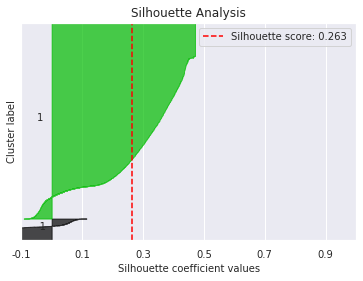

In [381]:
skplt.metrics.plot_silhouette(X_test_te, cluster_labels_test)
plt.show()

<Figure size 432x288 with 0 Axes>

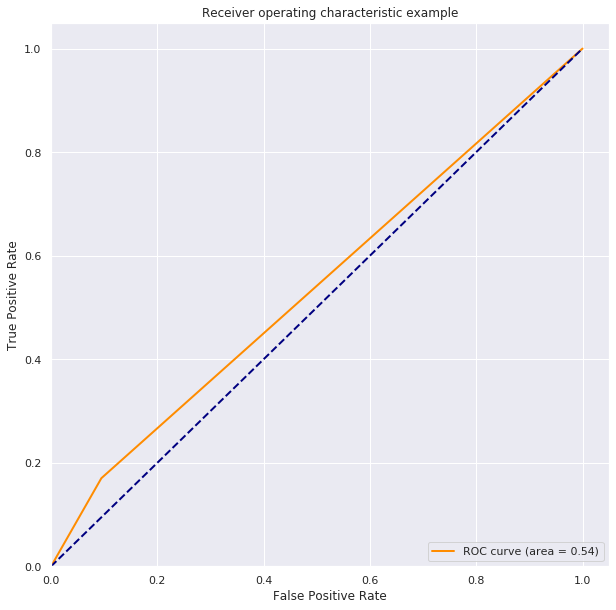

In [366]:
#y_score = ocs.decision_function(X_test_te)

 ###計算真正率和假正率
fpr,tpr,threshold = roc_curve(y_test, y_pre_test_env) ###計算真正率和假正率
###計算auc的值
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
 ###假正率為橫座標，真正率為縱座標做曲線
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

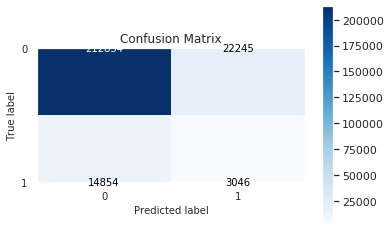

In [370]:
skplt.metrics.plot_confusion_matrix(y_test, y_pre_test_env)

In [367]:
cr = classification_report(y_test,y_pre_test_env)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    235079
           1       0.12      0.17      0.14     17900

    accuracy                           0.85    252979
   macro avg       0.53      0.54      0.53    252979
weighted avg       0.88      0.85      0.86    252979



In [368]:
cro = classification_report(y_outliers,y_pre_outliers_env)
print(cro)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.17      0.29     59432

    accuracy                           0.17     59432
   macro avg       0.50      0.08      0.14     59432
weighted avg       1.00      0.17      0.29     59432



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# OneClassSVM(nu=0.15, kernel='rbf', gamma=0.1)+TargetEncoding

In [235]:
ocs = svm.OneClassSVM(nu=0.15, kernel='rbf', gamma=0.1)

## [Training] By OneClassSVM it need some times due to High Demision in Support Vector Machine

In [236]:
ocs.fit(X_train_te)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, shrinking=True, tol=0.001, verbose=False)

In [343]:
y_pre_train_ocs = ocs.predict(X_train_te)
y_pre_test_ocs = ocs.predict(X_test_te)
y_pred_outliers_ocs = ocs.predict(X_outliers_te)

## 異常檢測會將負樣本(已退費)label設定為-1 ,正樣本設定為1
## 下方將正樣本改為0,負樣本改為1

In [344]:
y_train_ocs=y_pre_train_ocs
y_train_ocs[y_pre_train_ocs==1]=0
y_train_ocs[y_pre_train_ocs==-1]=1

y_test_ocs=y_pre_test_ocs
y_test_ocs[y_pre_test_ocs==1]=0
y_test_ocs[y_pre_test_ocs==-1]=1

y_outliers_ocs=y_pred_outliers_ocs
y_outliers_ocs[y_pred_outliers_ocs==1]=0
y_outliers_ocs[y_pred_outliers_ocs==-1]=1

In [348]:
print(f1_score(y_test,y_test_ocs))
print(f1_score(y_outliers,y_outliers_ocs))
print(roc_auc_score(y_test,y_test_ocs))

0.5954106065191462
0.9655274448882971
0.9212872497801227


In [245]:
y_score = ocs.decision_function(X_test_te)

## [Evaulation] F1_score,AUC_score, ROC by OneclassSVM

In [374]:
print(f1_score(y_test,y_test_ocs))
print(f1_score(y_outliers,y_outliers_ocs))
print(roc_auc_score(y_test,y_test_ocs))

0.5954106065191462
0.9655274448882971
0.9212872497801227


<Figure size 432x288 with 0 Axes>

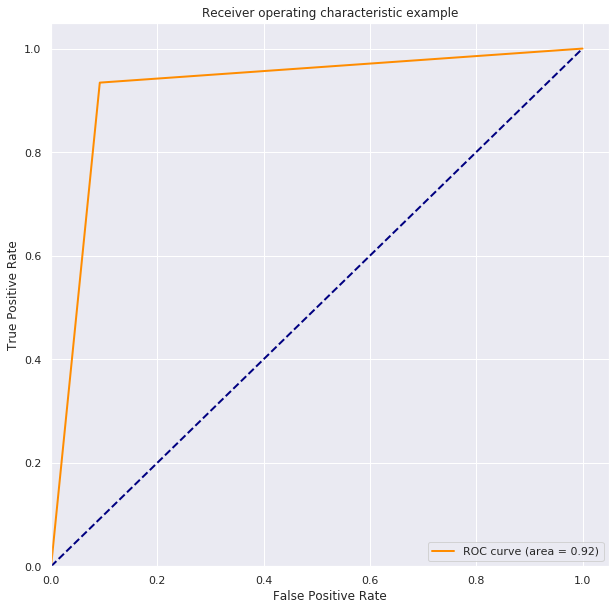

In [352]:
 ###計算真正率和假正率
fpr,tpr,threshold = roc_curve(y_test, y_test_ocs) ###計算真正率和假正率
###計算auc的值
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
 ###假正率為橫座標，真正率為縱座標做曲線
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

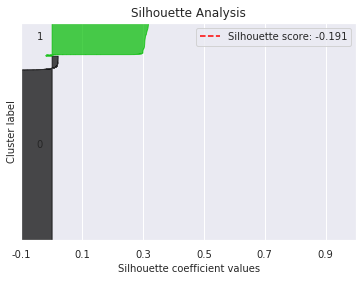

In [319]:
skplt.metrics.plot_silhouette(X_test_te, y_test_ocs)
plt.show()

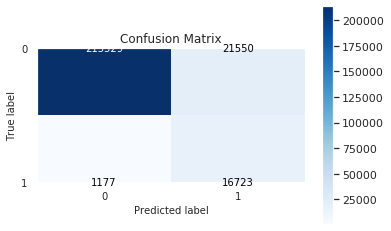

In [357]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_ocs)

In [353]:
cf = confusion_matrix(y_test,y_test_ocs)
print(cf)

cr = classification_report(y_test,y_test_ocs)
print(cr)

[[213529  21550]
 [  1177  16723]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    235079
           1       0.44      0.93      0.60     17900

    accuracy                           0.91    252979
   macro avg       0.72      0.92      0.77    252979
weighted avg       0.96      0.91      0.92    252979



In [369]:
cro = classification_report(y_outliers,y_outliers_ocs)
print(cro)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.93      0.97     59432

    accuracy                           0.93     59432
   macro avg       0.50      0.47      0.48     59432
weighted avg       1.00      0.93      0.97     59432



# 效益不大;不參考 MinMaxScaler效益不大 不參考

### OneClassSVM+MinMaxScaler

In [189]:
'''Scale = MinMaxScaler()
X_train_scale = Scale.fit_transform(X_train)
X_test_scale = Scale.fit_transform(X_test)
X_outliers_sclae = Scale.fit_transform(X_outliers)
irf.fit(X_train_scale)
y_pre_train_r = irf.predict(X_train_scale)
y_pre_test_r = irf.predict(X_test_scale)
y_pred_outliers_r = irf.predict(X_outliers_sclae)
y_pre_train1=y_pre_train_r
y_pre_train1[y_pre_train_r==1]=0
y_pre_train1[y_pre_train_r==-1]=1
y_pre_test1=y_pre_test_r
y_pre_test1[y_pre_test_r==1]=0
y_pre_test1[y_pre_test_r==-1]=1
y_pre_outlier1 =  y_pred_outliers_r
y_pre_outlier1[y_pred_outliers_r==1]=0
y_pre_outlier1[y_pred_outliers_r==-1]=1'''

'Scale = MinMaxScaler()\nX_train_scale = Scale.fit_transform(X_train)\nX_test_scale = Scale.fit_transform(X_test)\nX_outliers_sclae = Scale.fit_transform(X_outliers)\nirf.fit(X_train_scale)'

In [194]:
print(f1_score(y_test,y_pre_test1))
print(f1_score(y_outliers,y_pre_outlier1))
print(confusion_matrix(y_test,y_pre_test1, labels=[1,0]))
print(classification_report(y_test,y_pre_test1))

0.06656627163403828
0.0
[[  1525  16375]
 [ 26394 208685]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91    235079
           1       0.05      0.09      0.07     17900

    accuracy                           0.83    252979
   macro avg       0.49      0.49      0.49    252979
weighted avg       0.87      0.83      0.85    252979



### OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1) + MinMaxScaler

In [69]:
Scale = MinMaxScaler()
X_train_scale = Scale.fit_transform(X_train)
X_test_scale = Scale.fit_transform(X_test)
X_outliers_sclae = Scale.fit_transform(X_outliers)

In [34]:
clf = svm.OneClassSVM(nu=0.5, kernel='rbf', gamma=0.1)

In [35]:
clf.fit(X_train_scale)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pre_train_c = clf.predict(X_train_scale)
y_pre_test_c = clf.predict(X_test_scale)
y_pred_outliers_c = clf.predict(X_outliers_sclae)

In [39]:
n_error_train = y_pre_train_c[y_pre_train_c == -1].size
n_error_test = y_pre_test_c[y_pre_test_c == -1].size/
n_error_outliers = y_pred_outliers_c[y_pred_outliers_c == 1].size

In [97]:
print(list(y_pre_test_c).count(1)/X_test_scale.shape[0])
print(list(y_pre_train_c).count(1)/X_train_scale.shape[0])
print(list(y_pred_outliers_c).count(-1)/X_outliers_sclae.shape[0])

0.5056111376833651
0.0
0.9999663480953022


In [80]:
y_pre_train=y_pre_train_c
y_pre_train[y_pre_train_c==1]=0
y_pre_train[y_pre_train_c==-1]=1
y_pre_test=y_pre_test_c
y_pre_test[y_pre_test_c==1]=0
y_pre_test[y_pre_test_c==-1]=1

In [86]:
f1_score(y_test,y_pre_test)

0.14491560877586432

In [88]:
matrix=confusion_matrix(y_test,y_pre_test, labels=[1,0])
matrix

array([[ 10565,   7335],
       [117344, 117735]], dtype=int64)

# ...

# ...

# ...

# 特徵工程 Part1 Feature Engineering

### 欄位變數為單一值

In [4]:
L11=[]
L22=list(df.isnull().sum()/len(df))
for i in df:
    #print('column name','kinds counts')
    L11.append((i,len(df[str(i)].value_counts())))
print('-'*10,'Item','-'*10)
df0 = pd.DataFrame(L11,columns=['column_name','species_counts'])
print(df0[df0['species_counts']==1])
print('-'*10,'value_counts','-'*10)
for i in df0['column_name'][df0['species_counts']==1]:
    print(df[str(i)].value_counts())

---------- Item ----------
        column_name  species_counts
435  WarrantyPeriod               1
---------- value_counts ----------
7    843342
Name: WarrantyPeriod, dtype: int64


### 欄位之空值數量

In [315]:
for i in df_check.columns:
    if 843342 not in df_check[str(i)].isnull().value_counts().tolist() and df_check[str(i)].isnull().value_counts().tolist()[0]>750000:
        print(df_check[str(i)].isnull().value_counts())

True     823581
False     19761
Name: LVdiffCNT, dtype: int64
True     838041
False      5301
Name: MGMLead, dtype: int64
True     838041
False      5301
Name: MGMRes, dtype: int64
True     838041
False      5301
Name: MGMDemo, dtype: int64
True     838041
False      5301
Name: MGMDeal, dtype: int64
True     837319
False      6023
Name: helpCNT, dtype: int64
True     837319
False      6023
Name: helpCNTmax, dtype: int64
True     837319
False      6023
Name: help3mCNT, dtype: int64
True     837319
False      6023
Name: help3mCNTmax, dtype: int64
True     837319
False      6023
Name: helpITCNT, dtype: int64
True     837319
False      6023
Name: helpITCNTmax, dtype: int64
True     837319
False      6023
Name: helpIT3mCNT, dtype: int64
True     837319
False      6023
Name: helpIT3mCNTmax, dtype: int64
True     837319
False      6023
Name: helpIiCNT, dtype: int64
True     837319
False      6023
Name: helpIiCNTmax, dtype: int64
True     837319
False      6023
Name: helpIi3mCNT, dtype: int64


In [166]:
dff_all = df[['DDwFD', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'help3mCNT', 
       'helpITCNT',  'helpIT3mCNT', 
       'helpIiCNT',  'helpIi3mCNT', 
       'helpMaCNT',  'helpMa3mCNT', 
       'helpTeCNT',  'helpTe3mCNT', 
       'helpconCNT', 'helpcon3mCNT', 
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax','FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']]

### 衍生變數及時間欄位型態調整

In [167]:
dff_all['MBA_technical'] = dff_all['MBA_technical'].fillna(0)
dff_all['MBA_customer'] = dff_all['MBA_customer'].fillna(0)
dff_all['MBA_Scheduling'] = dff_all['MBA_Scheduling'].fillna(0)
dff_all['MBA_Class'] = dff_all['MBA_Class'].fillna(0)
dff_all['MBA_Service'] = dff_all['MBA_Service'].fillna(0)
dff_all['MBA_total']=dff_all['MBA_Class']+dff_all['MBA_Scheduling']+dff_all['MBA_Service']+dff_all['MBA_customer']+dff_all['MBA_technical']
dff_all['mbadate_First']=pd.to_datetime(dff_all['mbadate_First']).dt.date
dff_all['mbadate_New']=pd.to_datetime(dff_all['mbadate_New']).dt.date
dff_all['FDsellingdate']=pd.to_datetime(dff_all['FDsellingdate']).dt.date
dff_all['mbdate']=pd.to_datetime(dff_all['mbdate']).dt.date
dff_all['mbadiff'] = dff_all['mbadate_New']-dff_all['mbadate_First']
dff_all['mbtime'] = dff_all['mbdate']-dff_all['FDsellingdate']
dff_all['mbaFtoSelltime'] = dff_all['mbadate_First']-dff_all['FDsellingdate']
dff_all['mbaNtoSelltime'] = dff_all['mbadate_New']-dff_all['FDsellingdate']
dff_all['mbFdiff'] = dff_all['mbdate']-dff_all['mbadate_First']
dff_all['mbNdiff'] = dff_all['mbdate']-dff_all['mbadate_New']
dff_all = dff_all.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
dff_all = dff_all.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
dff_all = dff_all.drop(['mbadate_First','mbadate_New','FDsellingdate','mbdate',],axis=1)
dff_all = dff_all.drop(['WarrantyPeriod'],axis=1)
dff_all = dff_all.drop(['product_sdate'],axis=1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [168]:
df_all = dff_all[['DuringMBA', 'RH', 'AH', 're', 'fbCNT', 'nCR', 'nMR', 'nTR',
       'nconcompla', 'nmatcompla', 'nteccompla',
       'accLIKE', 'proLIKE', 'accDLIKE','FavorCNT', 'BlockCNT',
       'AddFavorCNT', 'AddBlockCNT', 'star', 'isIntCNT', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT', 'conOTHCNT',
       'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT', 'conEx01CNT',
       'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT', 'conage40CNT',
       'conage50CNT', 'conage60CNT', 'conage61CNT',
       'helpconCNT',  'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT',
       'ALL_nCR', 'ALL_nMR', 'ALL_nTR',  'ALL_AddFavorCNT',
       'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT',
       'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT',
       'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT',
       'ALL_conEx24CNT', 'ALL_conage30CNT', 'ALL_conage40CNT',
       'ALL_conage50CNT', 'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT',
       'ALL_conFCNT', 'ALL_helpCNT', 'ALL_help3mCNT',
        'ALL_helpITCNT', 'ALL_helpIT3mCNT', 'ALL_helpIiCNT', 'ALL_helpIi3mCNT', 
       'ALL_helpMaCNT',  'ALL_helpMa3mCNT',
       'ALL_helpTeCNT', 'ALL_helpTe3mCNT',  'ALL_helpconCNT','ALL_helpcon3mCNT', 'mb',
       'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff','mbaFtoSelltime',
       'mbaNtoSelltime']]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843342 entries, 0 to 843341
Data columns (total 89 columns):
DuringMBA           843342 non-null int64
RH                  218947 non-null float64
AH                  218947 non-null float64
re                  218947 non-null float64
fbCNT               218947 non-null float64
nCR                 128848 non-null float64
nMR                 128813 non-null float64
nTR                 128848 non-null float64
nconcompla          218947 non-null float64
nmatcompla          218947 non-null float64
nteccompla          218947 non-null float64
accLIKE             218947 non-null float64
proLIKE             218947 non-null float64
accDLIKE            218947 non-null float64
FavorCNT            218947 non-null float64
BlockCNT            218947 non-null float64
AddFavorCNT         218947 non-null float64
AddBlockCNT         218947 non-null float64
star                101290 non-null float64
isIntCNT            191855 non-null float64
conUUCCNT  

In [169]:
df_test = df_all
print(df_test.shape)
df_test.describe()

(843342, 89)


,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nmatcompla,nteccompla,accLIKE,proLIKE,accDLIKE,FavorCNT,BlockCNT,AddFavorCNT,AddBlockCNT,star,isIntCNT,conUUCCNT,conSOUCNT,conSERCNT,conTWBCNT,conOTHCNT,conLigCNT,conMedCNT,conTanCNT,conDarCNT,conEx01CNT,conEx03CNT,conEx12CNT,conEx24CNT,conage30CNT,conage40CNT,conage50CNT,conage60CNT,conage61CNT,helpconCNT,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_help3mCNT,ALL_helpITCNT,ALL_helpIT3mCNT,ALL_helpIiCNT,ALL_helpIi3mCNT,ALL_helpMaCNT,ALL_helpMa3mCNT,ALL_helpTeCNT,ALL_helpTe3mCNT,ALL_helpconCNT,ALL_helpcon3mCNT,mb,mb_STV,mbaCNT,MBA_total,mbadiff,mbaFtoSelltime,mbaNtoSelltime
count,843342.000000,218947.000000,218947.000000,218947.000000,218947.000000,128848.000000,128813.000000,128848.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,101290.000000,191855.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,218947.000000,42440.000000,671990.000000,671990.000000,655080.000000,671990.000000,573976.000000,573961.000000,573976.000000,286174.000000,43214.000000,597112.000000,655040.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,671990.000000,89576.000000,89576.000000,89576.000000,89576.000000,89576.000000,89576.000000,89576.000000,89576.000000,89576.000000,89576.000000,508216.000000,508216.000000,843342.000000,843342.000000,166467.000000,843342.000000,166467,166467,166467
mean,0.009032,1.202172,1.032574,0.013058,0.663471,9.535936,9.506436,9.450986,0.034118,0.034118,0.072643,0.009646,0.005874,0.005842,0.083148,0.000128,0.120536,0.006869,4.201965,0.917766,0.284443,0.376995,0.109894,0.069122,0.192088,0.414324,0.174056,0.090236,0.352711,0.073835,0.224442,0.308011,0.283082,0.582095,0.258748,0.113151,0.059654,0.018895,2.113365,13.025454,11.384448,0.166612,7.388120,9.486173,9.441158,9.348757,3.221743,1.301384,3.862096,9.071556,3.220735,3.859409,1.207702,1.033956,2.062386,4.502438,2.207896,0.978448,3.683830,0.766285,2.431279,3.277433,3.313420,6.254349,2.948617,1.271169,0.687653,0.222401,3.897826,7.486363,1.666479,0.654127,1.267831,0.439447,0.117277,0.099277,0.106704,0.050609,0.165916,0.056928,2.081111,0.889410,0.070477,1660.948414,1.096758,0.223764,7 days 01:09:08.541152,83 days 07:00:10.964335,90 days 08:09:19.505487
std,0.094606,0.820364,0.731891,0.114764,0.678316,0.973505,0.974743,1.136242,0.184304,0.184304,0.267830,0.100323,0.079000,0.077160,0.311914,0.011705,0.351010,0.083913,1.405219,0.685772,0.536652,0.560043,0.326267,0.285768,0.426551,0.617892,0.421540,0.294492,0.540846,0.267717,0.443102,0.508702,0.554851,0.635491,0.484264,0.332795,0.244455,0.137755,1.628122,15.565204,12.757239,0.484575,9.233901,0.822465,0.860676,0.979931,3.506586,0.800064,1.004655,10.198514,5.648840,5.405671,2.152502,3.275824,3.149120,6.759710,4.211615,1.563043,4.840713,1.285178,2.994869,3.964875,5.730183,7.059479,3.910929,2.031778,1.382577,0.637832,5.542123,8.086915,0.867205,0.687287,1.006478,0.643222,0.367130,0.321424,0.366015,0.229324,0.510674,0.233437,1.195323,0.813926,0.255949,6441.766538,0.327702,0.490497,30 days 19:08:09.942140,72 days 18:49:40.641173,75 days 05:17:45.125832
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00

### mbadiff/mbaFtoSelltime/mbaNtoSelltime 欄位型態轉換

In [170]:
#df_test['mbadiff'] = df_test['mbadiff'].replace(np.nan, 0, inplace=True)
#df_test['mbadiff'] = df_test['mbadiff'].replace(np.inf, 0, inplace=True)
df_test['mbadiff'] = (df_test['mbadiff'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaFtoSelltime'] = (df_test['mbaFtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaNtoSelltime'] = (df_test['mbaNtoSelltime'] / np.timedelta64(1, 'D')).astype(float)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [171]:
df_test['RH'] = df_test['RH'].fillna(df_test['RH'].median())
df_test['AH'] = df_test['AH'].fillna(df_test['AH'].median())
df_test['re'] = df_test['re'].fillna(df_test['re'].median())
df_test['fbCNT'] = df_test['fbCNT'].fillna(df_test['fbCNT'].median())

df_test['nCR'] = df_test['nCR'].fillna(df_test['nCR'].mean())
df_test['nMR'] = df_test['nMR'].fillna(df_test['nMR'].mean())
df_test['nTR'] = df_test['nTR'].fillna(df_test['nTR'].mean())
df_test['nconcompla'] = df_test['nconcompla'].fillna(df_test['nconcompla'].mean())
df_test['nmatcompla'] = df_test['nmatcompla'].fillna(df_test['nmatcompla'].mean())
df_test['nteccompla'] = df_test['nteccompla'].fillna(df_test['nteccompla'].mean())

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

### Stat/ALL_star 欄位調整

In [173]:
df_test['star'] = df_test['star'].fillna(5)
df_test = df_test[df_test['star']<15.0]
df_test['ALL_star'] = df_test['ALL_star'].fillna(4)
df_test = df_test[df_test['ALL_star']<100.0]
df_test['isIntCNT'] = df_test['isIntCNT'].fillna(1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
df_test[[ 'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT',
       'ALL_nCR', 'ALL_nMR', 'ALL_nTR',  'ALL_AddFavorCNT',
       'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT',
       'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT',
       'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT',
       'ALL_conEx24CNT', 'ALL_conage30CNT', 'ALL_conage40CNT',
       'ALL_conage50CNT', 'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT',
       'ALL_conFCNT', 'ALL_helpCNT', 'ALL_help3mCNT',
        'ALL_helpITCNT', 'ALL_helpIT3mCNT', 'ALL_helpIiCNT', 'ALL_helpIi3mCNT', 
       'ALL_helpMaCNT',  'ALL_helpMa3mCNT',
       'ALL_helpTeCNT', 'ALL_helpTe3mCNT',  'ALL_helpconCNT','ALL_helpcon3mCNT']].describe()

,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_help3mCNT,ALL_helpITCNT,ALL_helpIT3mCNT,ALL_helpIiCNT,ALL_helpIi3mCNT,ALL_helpMaCNT,ALL_helpMa3mCNT,ALL_helpTeCNT,ALL_helpTe3mCNT,ALL_helpconCNT,ALL_helpcon3mCNT
count,671948.000000,671948.000000,655038.000000,671948.000000,573940.000000,573925.000000,573940.000000,286153.000000,43212.000000,843300.000000,654998.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.00000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,671948.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,89568.000000,508178.000000,508178.000000
mean,13.024777,11.383793,0.166599,7.387898,9.486174,9.441160,9.348757,3.221735,1.301398,3.902081,9.071115,3.220511,3.859203,1.207638,1.033891,2.062291,4.502220,2.207738,0.978390,3.683608,0.766253,2.431228,3.277255,3.313182,6.25399,2.948442,1.271104,0.687619,0.222379,3.897639,7.485895,1.666470,0.654134,1.267836,0.439443,0.117286,0.099285,0.106685,0.050613,0.165912,0.056927,2.081107,0.889414
std,15.564140,12.755944,0.484558,9.233662,0.822478,0.860682,0.979941,3.506542,0.800080,0.830232,10.197504,5.648746,5.404943,2.152442,3.275743,3.148757,6.759604,4.211262,1.562934,4.839924,1.285059,2.994842,3.964389,5.730036,7.05862,3.910488,2.031755,1.382546,0.637820,5.541798,8.085903,0.867236,0.687292,1.006497,0.643227,0.367145,0.321437,0.365989,0.229334,0.510694,0.233445,1.195324,0.813942
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,4.000000,0.000000,2.000000,9.230769,9.076923,9.000000,1.000000,1.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.00000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,0.333333
50%,10.000000,9.000000,0.000000,5.000000,9.800000,9.812500,9.733333,2.000000,1.000000,4.000000,7.000000,2.000000,2.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,5.00000,2.000000,1.000000,0.000000,0.000000,3.000000,6.000000,1.500000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.888888
75%,17.000000,15.000000,0.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000,4.000000,12.000000,4.000000,5.000000,2.000000,0.000000,3.000000,6.000000,2.000000,1.000000,5.000000,1.000000,3.000000,5.000000,4.000000,8.00000,4.000000,2.000000,1.000000,0.000000,5.000000,10.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000
max,720.000000,451.000000,10.000000,420.000000,10.000000,10.000000,10.000000,101.000000,16.000000,61.000000,320.000000,246.000000,175.000000,78.000000,155.000000,108.000000,331.000000,172.000000,52.000000,150.000000,26.000000,73.000000,133.000000,376.000000,203.00000,149.000000,84.000000,72.000000,20.000000,291.000000,220.000000,10.000000,7.000000,10.000000,7.000000,6.000000,6.000000,6.000000,4.000000,8.000000,4.000000,34.000000,14.000000


### ALL_RH/ALL_AH/ALL_re/ALL_fbCNT 取中位數 (median())
### ALL_nCR/ALL_nMR/ALL_nTR 取平均數(mean())

In [175]:
df_test['ALL_RH'] = df_test['ALL_RH'].fillna(df_test['ALL_RH'].median())
df_test['ALL_AH'] = df_test['ALL_AH'].fillna(df_test['ALL_AH'].median())
df_test['ALL_re'] = df_test['ALL_re'].fillna(df_test['ALL_re'].median())
df_test['ALL_fbCNT'] = df_test['ALL_fbCNT'].fillna(df_test['ALL_fbCNT'].median())
df_test['ALL_nCR'] = df_test['ALL_nCR'].fillna(df_test['ALL_nCR'].mean())
df_test['ALL_nMR'] = df_test['ALL_nMR'].fillna(df_test['ALL_nMR'].mean())
df_test['ALL_nTR'] = df_test['ALL_nTR'].fillna(df_test['ALL_nTR'].mean())

### 剩下之空值 取0

In [176]:
df_all = df_test.fillna(0)

In [148]:
#df_all['mbadiff'] =  df_all['mbadiff'].dt.seconds
#df_all['mbaFtoSelltime'] =  df_all['mbaFtoSelltime'].dt.seconds
#df_all['mbaNtoSelltime'] =  df_all['mbaNtoSelltime'].dt.seconds

In [191]:
df_all = df_all[df_all['mbaFtoSelltime']>=0.0]
df_all = df_all[df_all['mbaNtoSelltime']>=0.0]
print(df_all.shape)
df_all.info()

(843261, 89)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 843261 entries, 0 to 843341
Data columns (total 89 columns):
DuringMBA           843261 non-null int64
RH                  843261 non-null float64
AH                  843261 non-null float64
re                  843261 non-null float64
fbCNT               843261 non-null float64
nCR                 843261 non-null float64
nMR                 843261 non-null float64
nTR                 843261 non-null float64
nconcompla          843261 non-null float64
nmatcompla          843261 non-null float64
nteccompla          843261 non-null float64
accLIKE             843261 non-null float64
proLIKE             843261 non-null float64
accDLIKE            843261 non-null float64
FavorCNT            843261 non-null float64
BlockCNT            843261 non-null float64
AddFavorCNT         843261 non-null float64
AddBlockCNT         843261 non-null float64
star                843261 non-null float64
isIntCNT            843261 non-null float6

# 相關變數之熱圖及線性關係

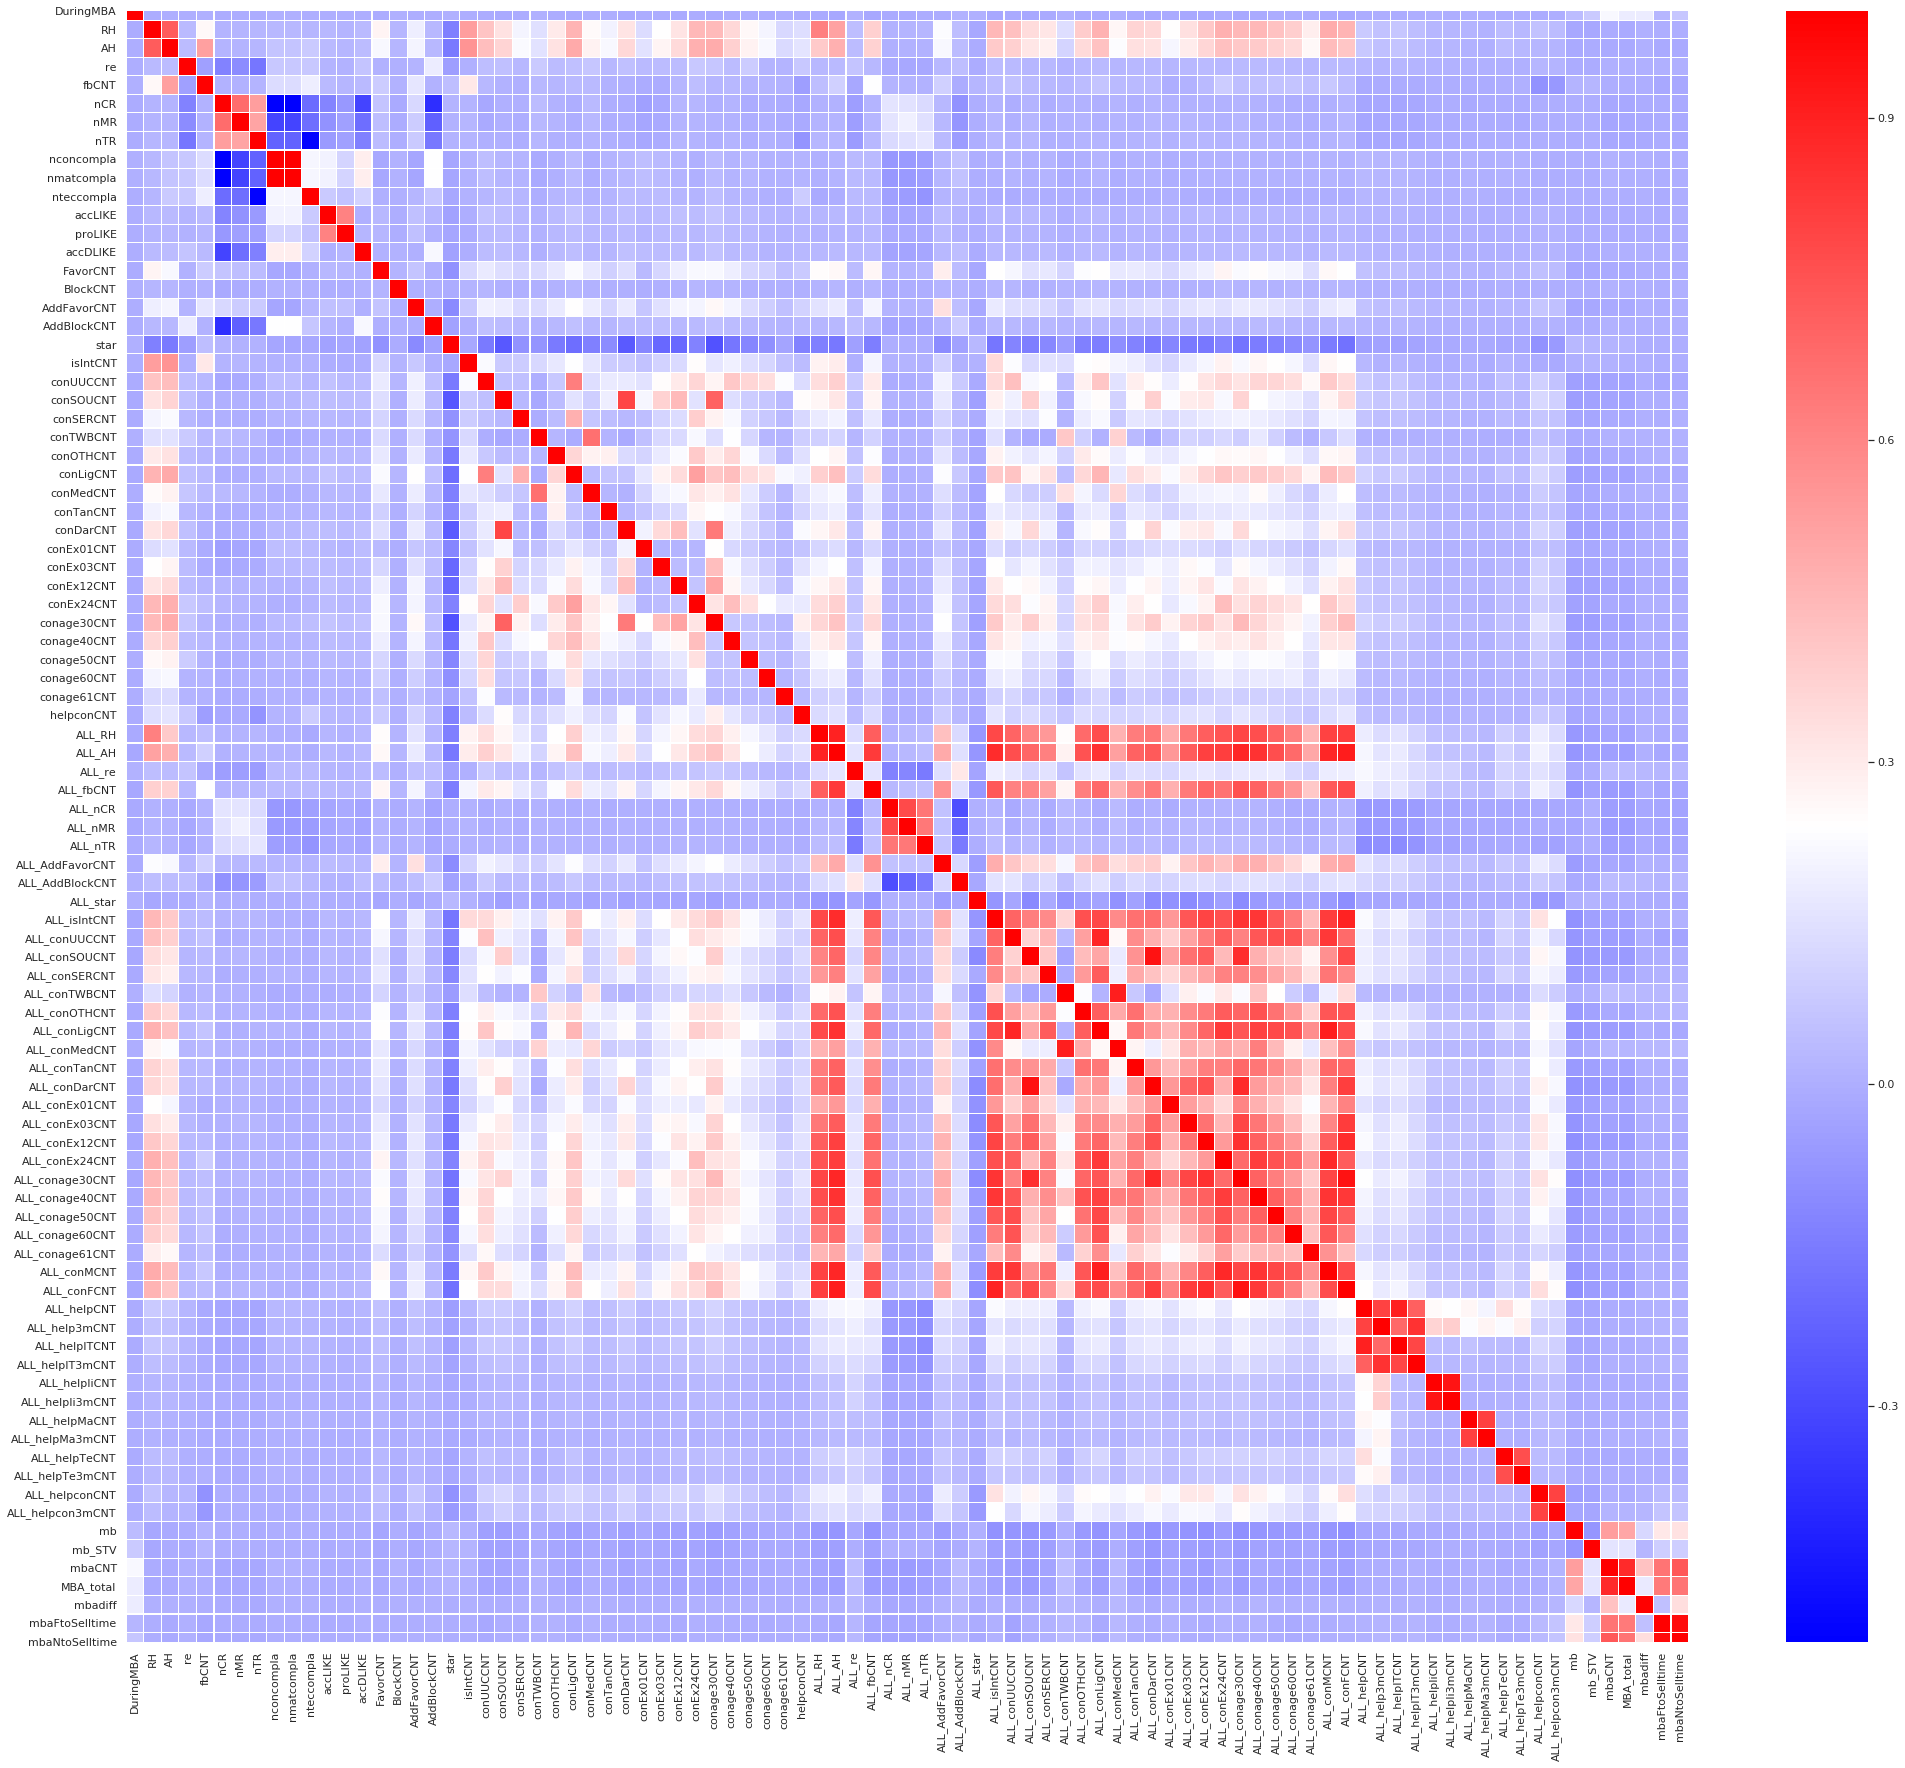

In [192]:
plt.figure(figsize=(35,30))
sns.heatmap(df_all.corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

In [193]:
df_all.corr()['mb'].sort_values(ascending = False)

mb                  1.000000
mbaCNT              0.528437
MBA_total           0.507001
mbaNtoSelltime      0.328758
mbaFtoSelltime      0.310943
mbadiff             0.124460
DuringMBA           0.039729
star                0.026961
fbCNT               0.019733
ALL_star            0.007861
isIntCNT            0.007424
BlockCNT            0.000021
ALL_conTWBCNT      -0.002363
nteccompla         -0.002638
nmatcompla         -0.002865
nconcompla         -0.002865
nMR                -0.003529
nCR                -0.003586
nTR                -0.004214
AddBlockCNT        -0.004216
accDLIKE           -0.006014
ALL_helpMa3mCNT    -0.006630
re                 -0.007211
proLIKE            -0.007528
ALL_helpMaCNT      -0.007913
ALL_helpTe3mCNT    -0.008592
accLIKE            -0.009466
ALL_helpIi3mCNT    -0.010801
conTWBCNT          -0.011199
ALL_helpIiCNT      -0.011444
conage61CNT        -0.012227
ALL_AddBlockCNT    -0.014234
AH                 -0.014635
ALL_helpIT3mCNT    -0.014774
ALL_helpTeCNT 

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

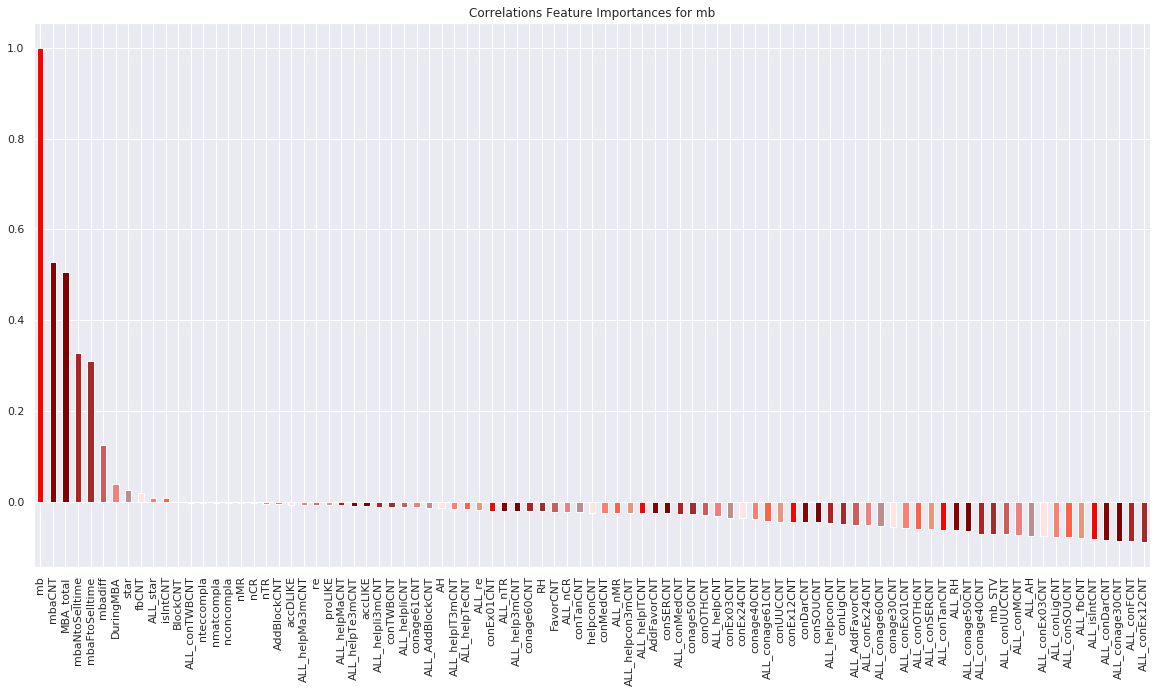

In [194]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_all.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [41]:
df_plt_all = df_all[['DDwFD', 'DuringMBA','ALL_RH', 'ALL_AH', 'ALL_re',
       'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR', 'ALL_nTR', 'ALL_nconcompla',
       'ALL_nmatcompla', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime']]

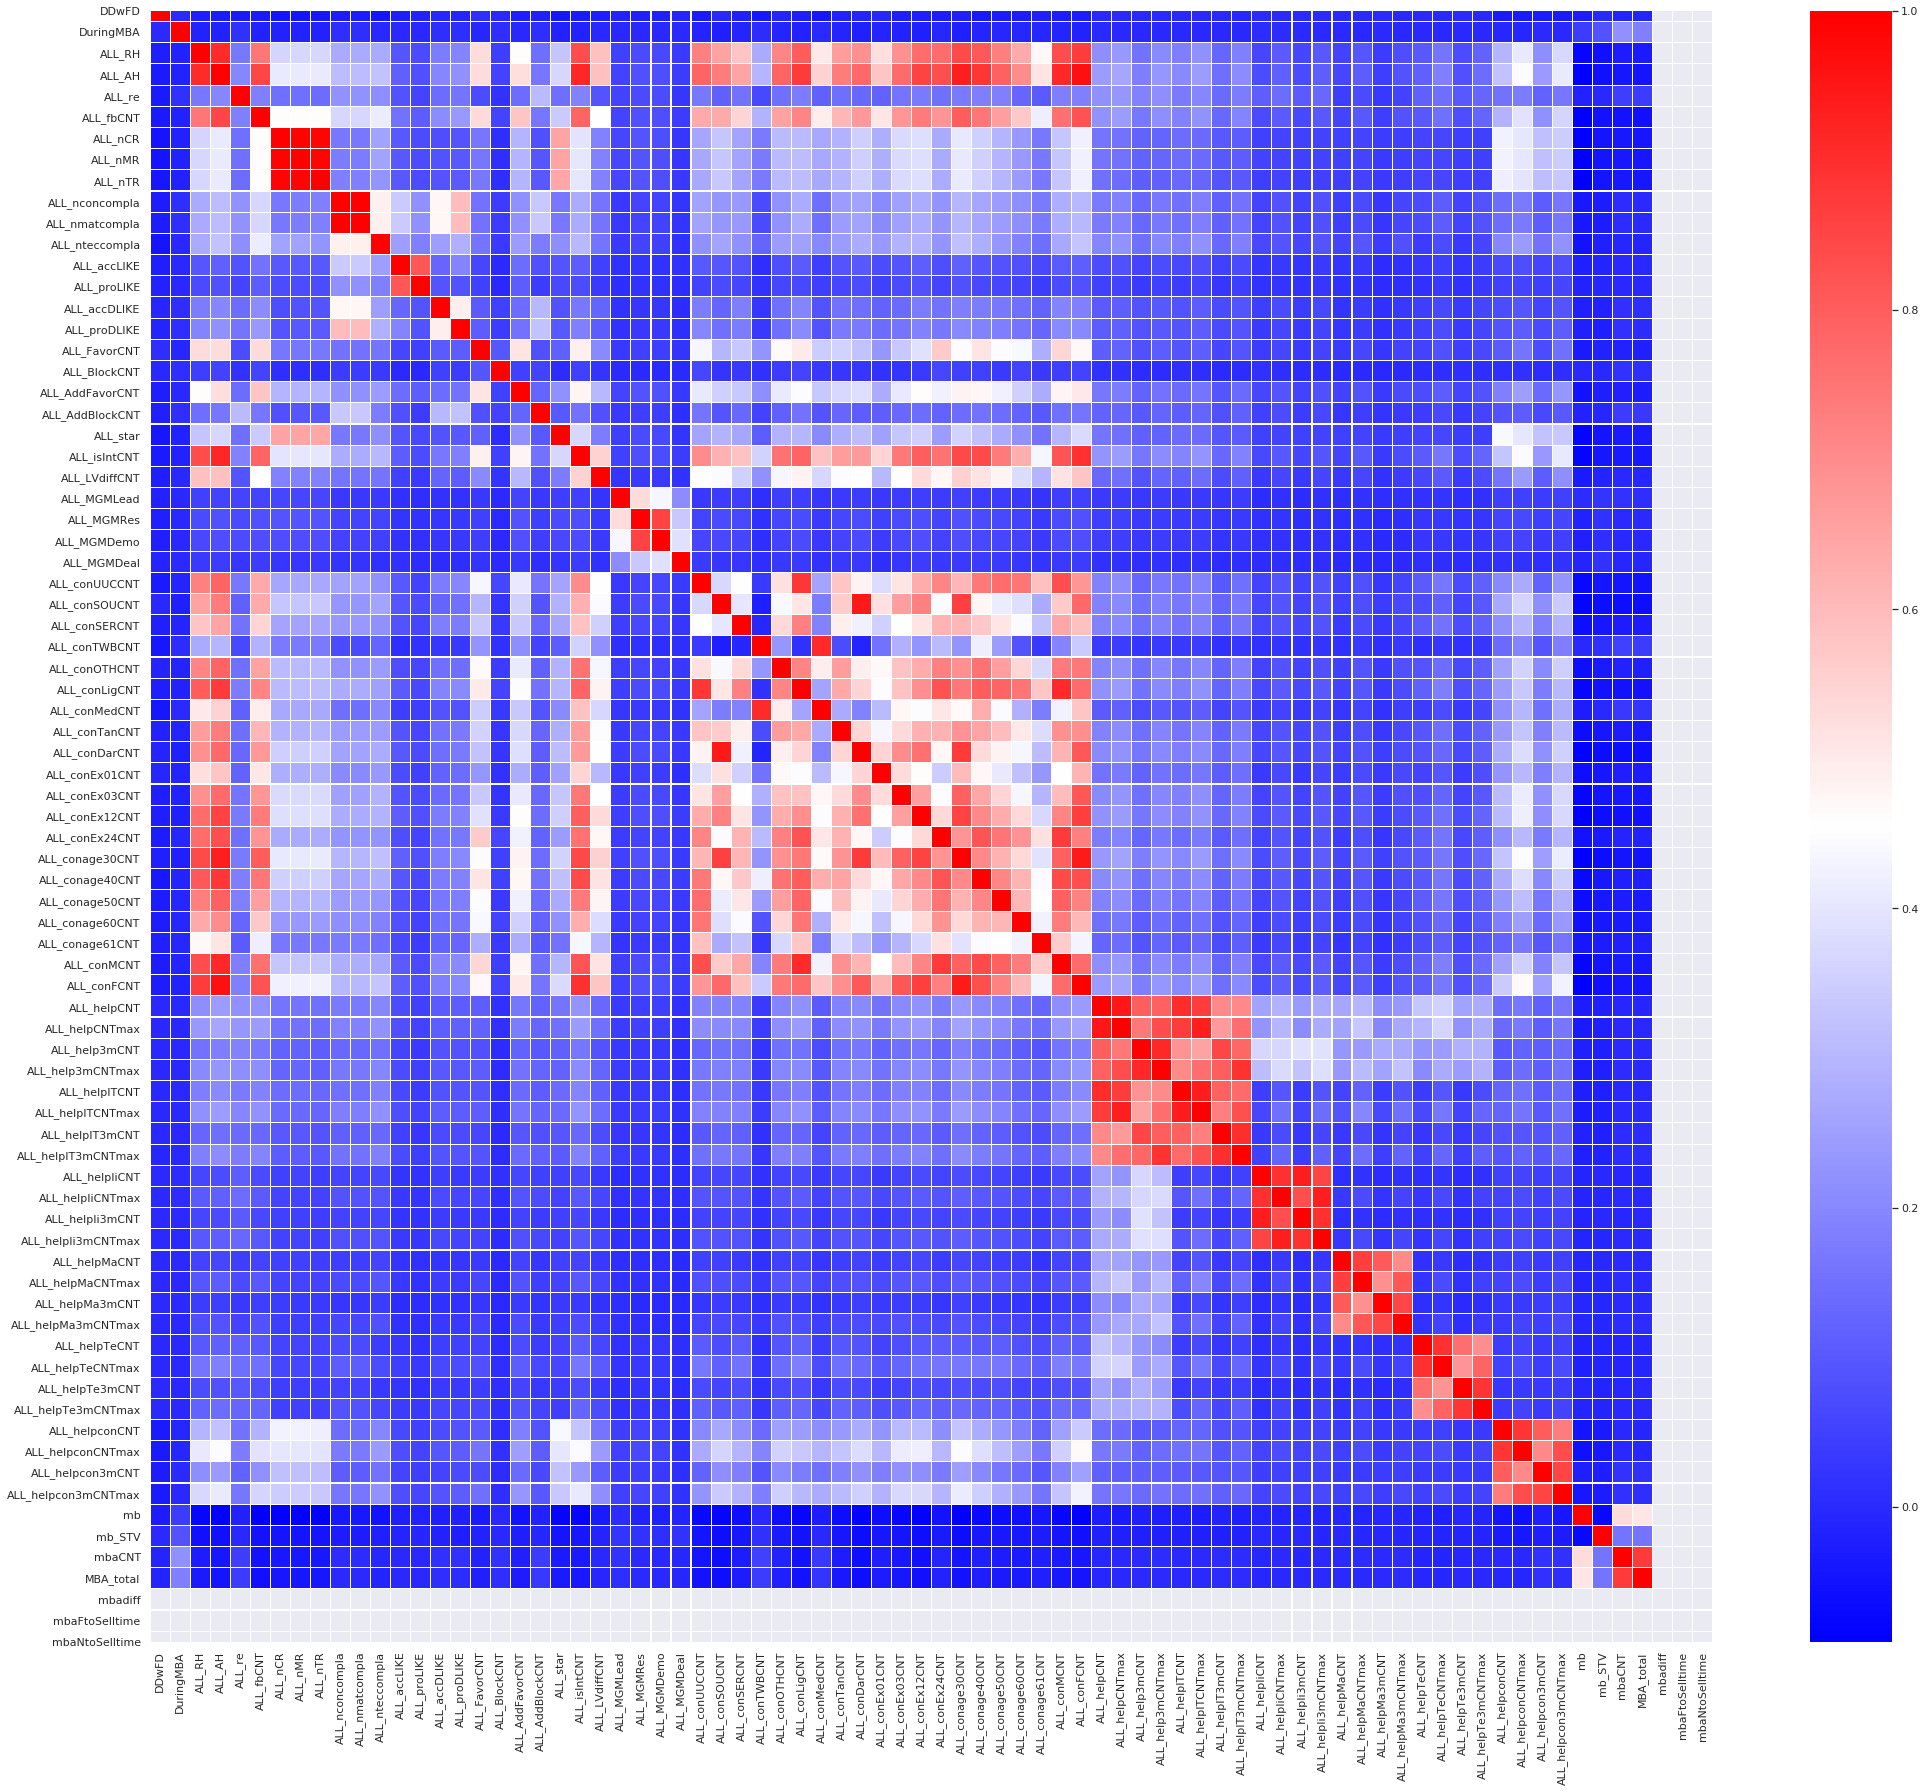

In [42]:
plt.figure(figsize=(35,30))
sns.heatmap(df_plt_all.corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

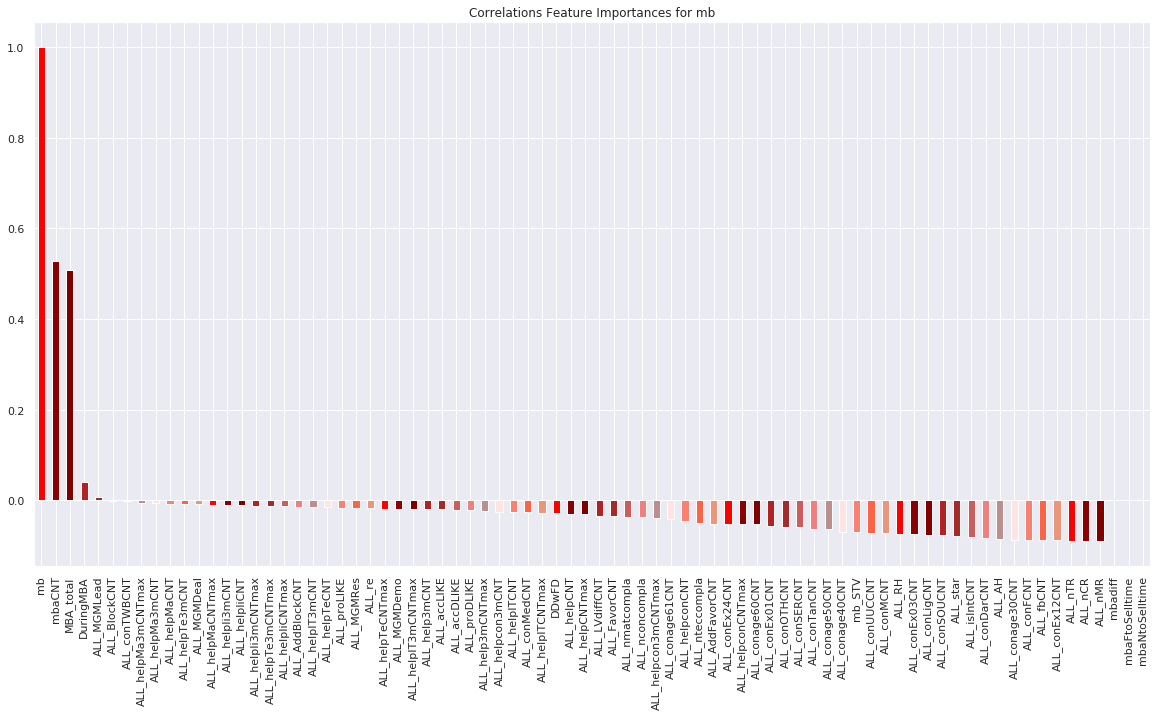

In [43]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_plt_all.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [44]:
df_plt_normal = df_all[['DDwFD', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT', 'nCR', 'nMR', 'nTR',
       'nconcompla', 'nconcompli', 'nmatcompla', 'nmatcompli', 'nteccompla',
       'accLIKE', 'proLIKE', 'accDLIKE', 'proDLIKE', 'FavorCNT', 'BlockCNT',
       'AddFavorCNT', 'AddBlockCNT', 'star', 'isIntCNT', 'LVdiffCNT',
       'MGMLead', 'MGMRes', 'MGMDemo', 'MGMDeal', 'conUUCCNT', 'conSOUCNT',
       'conSERCNT', 'conTWBCNT', 'conOTHCNT', 'conLigCNT', 'conMedCNT',
       'conTanCNT', 'conDarCNT', 'conEx01CNT', 'conEx03CNT', 'conEx12CNT',
       'conEx24CNT', 'conage30CNT', 'conage40CNT', 'conage50CNT',
       'conage60CNT', 'conage61CNT', 'conMCNT', 'conFCNT', 'helpCNT',
       'helpCNTmax', 'help3mCNT', 'help3mCNTmax', 'helpITCNT', 'helpITCNTmax',
       'helpIT3mCNT', 'helpIT3mCNTmax', 'helpIiCNT', 'helpIiCNTmax',
       'helpIi3mCNT', 'helpIi3mCNTmax', 'helpMaCNT', 'helpMaCNTmax',
       'helpMa3mCNT', 'helpMa3mCNTmax', 'helpTeCNT', 'helpTeCNTmax',
       'helpTe3mCNT', 'helpTe3mCNTmax', 'helpconCNT', 'helpconCNTmax',
       'helpcon3mCNT', 'helpcon3mCNTmax','mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime']]

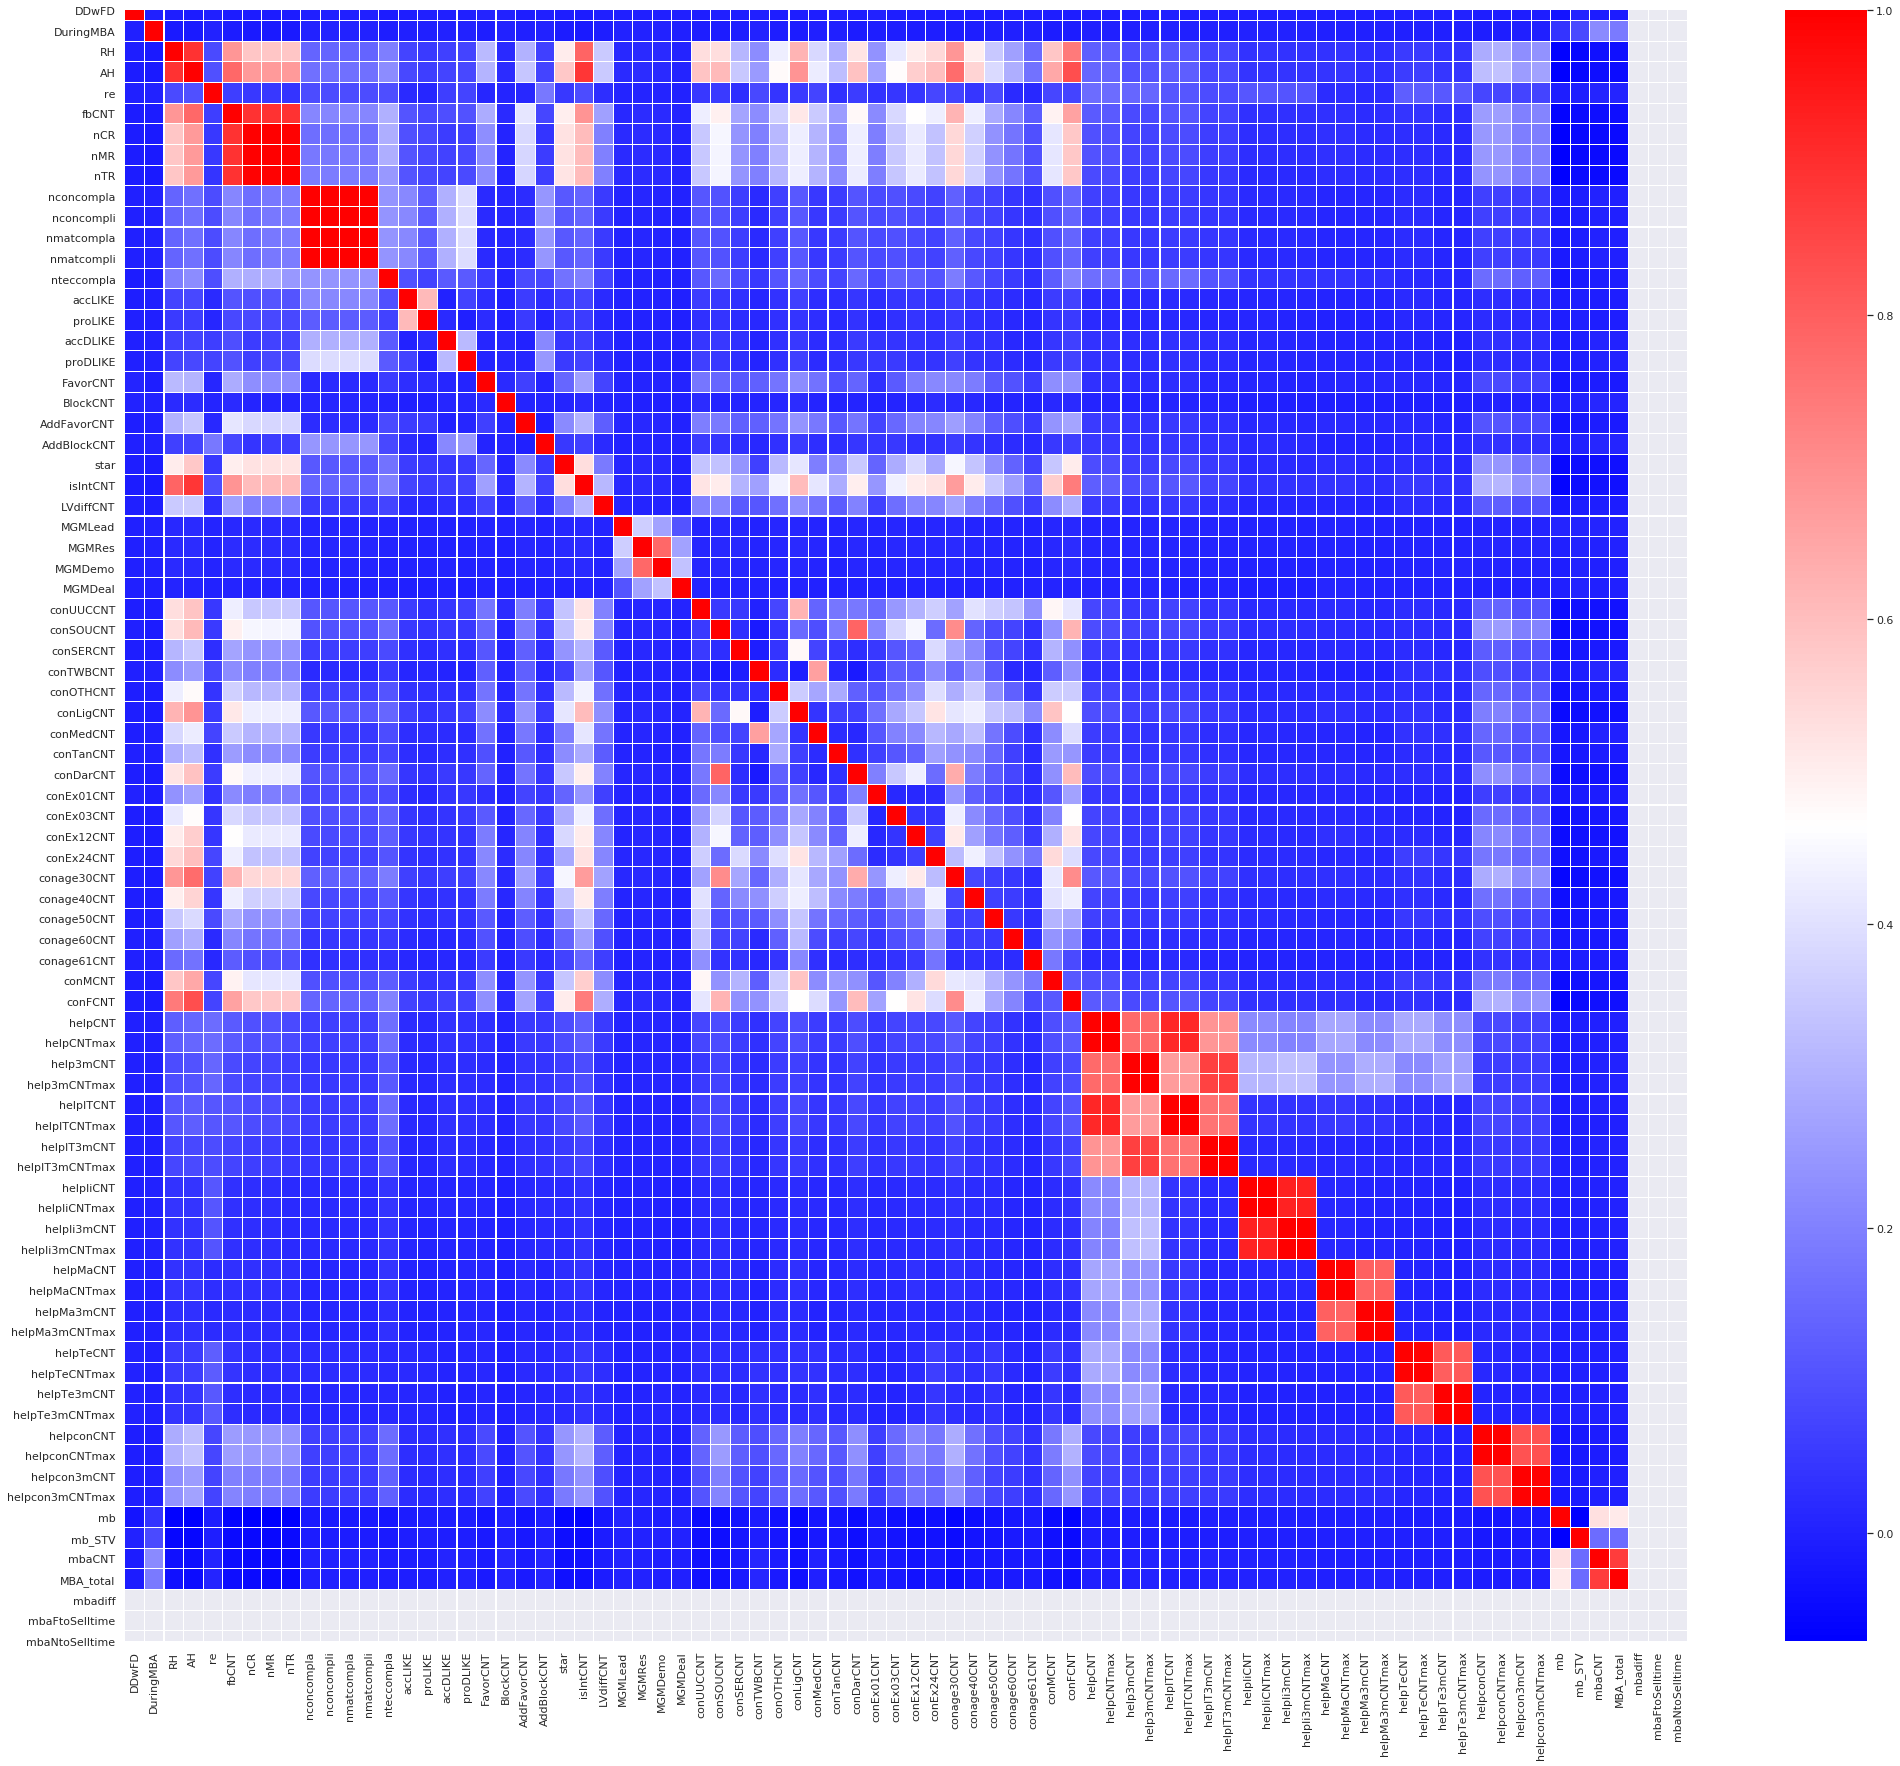

In [45]:
plt.figure(figsize=(35,30))
sns.heatmap(df_plt_normal.corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

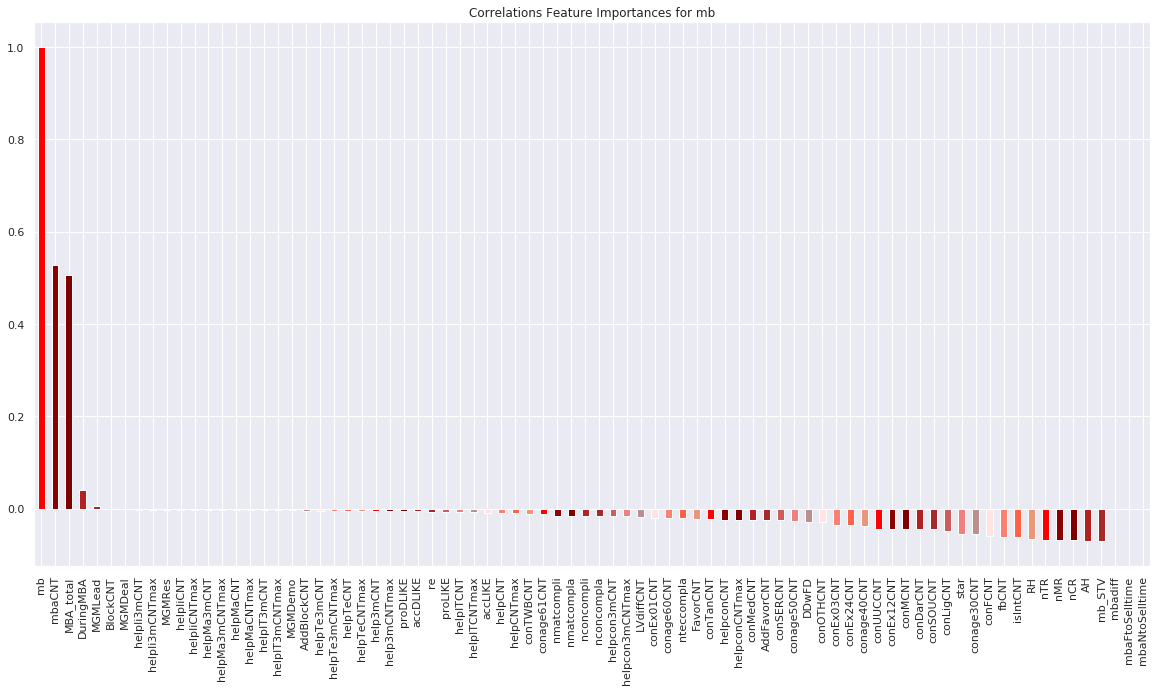

In [46]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_plt_normal.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [47]:
df_plt_help = df_all[[ 'helpCNT',
       'helpCNTmax', 'help3mCNT', 'help3mCNTmax', 'helpITCNT', 'helpITCNTmax',
       'helpIT3mCNT', 'helpIT3mCNTmax', 'helpIiCNT', 'helpIiCNTmax',
       'helpIi3mCNT', 'helpIi3mCNTmax', 'helpMaCNT', 'helpMaCNTmax',
       'helpMa3mCNT', 'helpMa3mCNTmax', 'helpTeCNT', 'helpTeCNTmax',
       'helpTe3mCNT', 'helpTe3mCNTmax', 'helpconCNT', 'helpconCNTmax',
       'helpcon3mCNT', 'helpcon3mCNTmax', 'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime']]

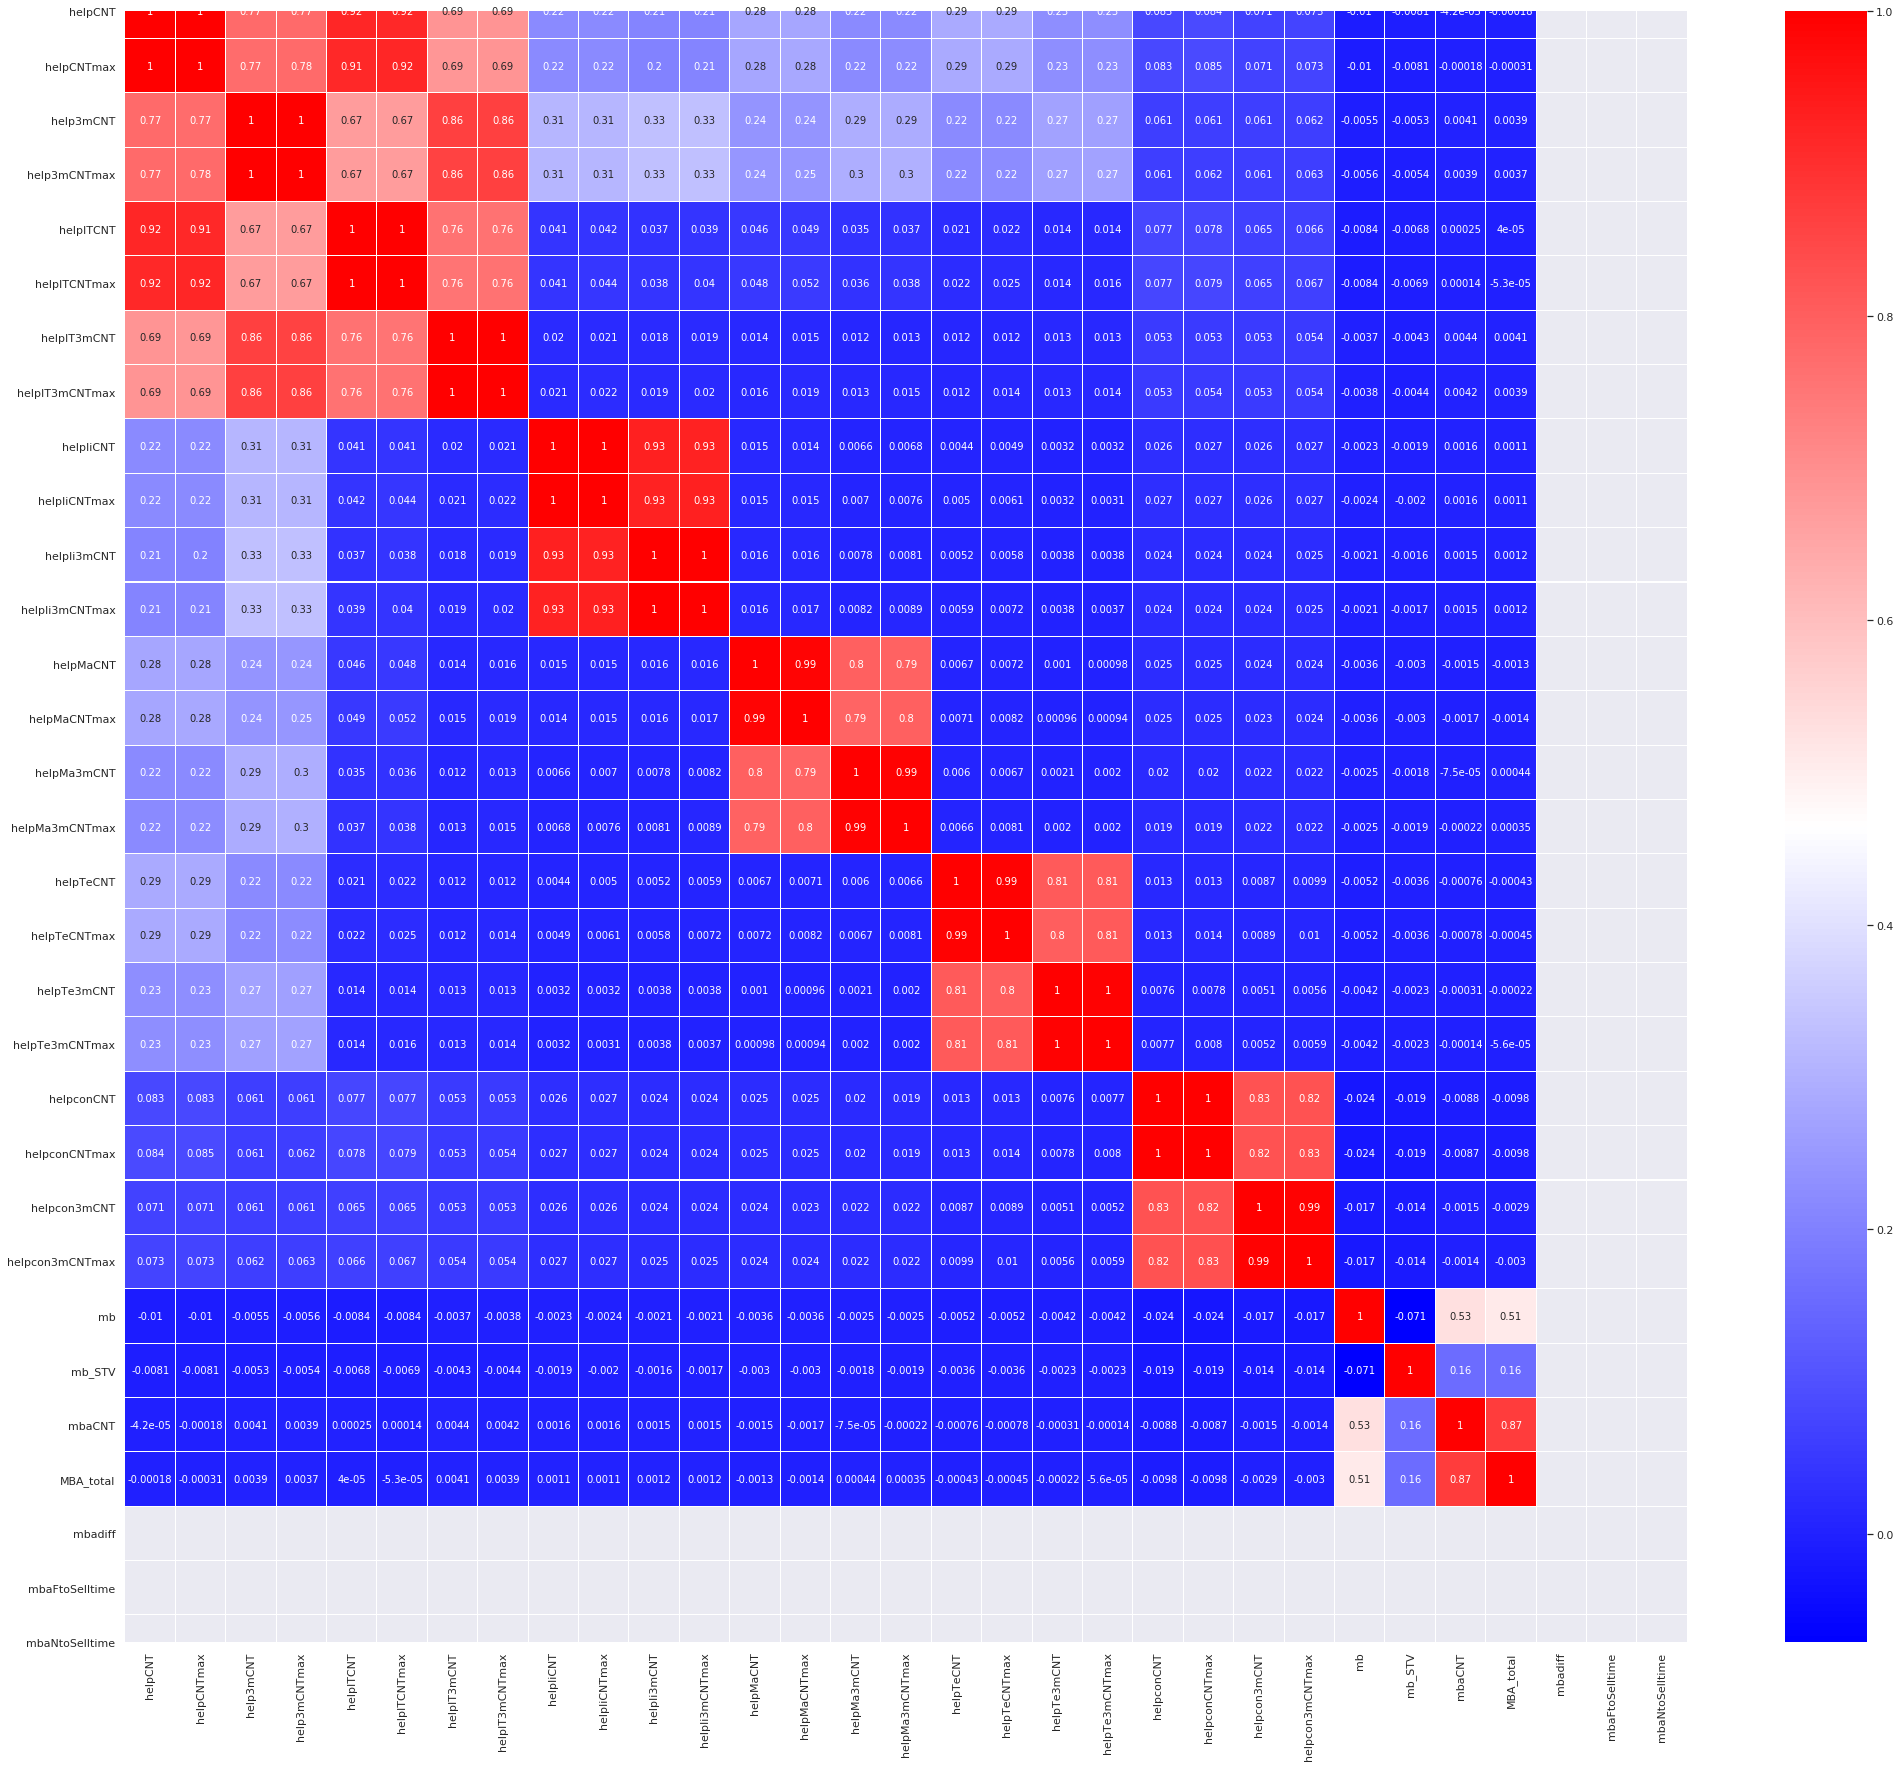

In [48]:
plt.figure(figsize=(35,30))
sns.heatmap(df_plt_help.corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

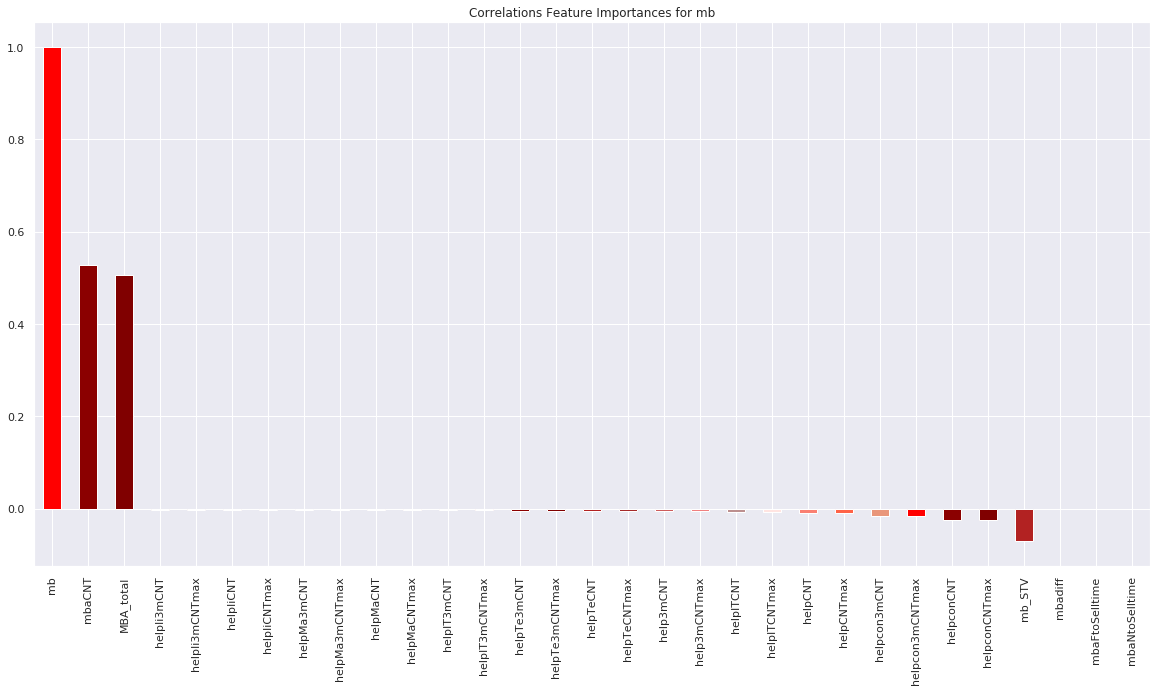

In [49]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_plt_help.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [50]:
df_plt_ALLhelp = df_all[[ 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime']]

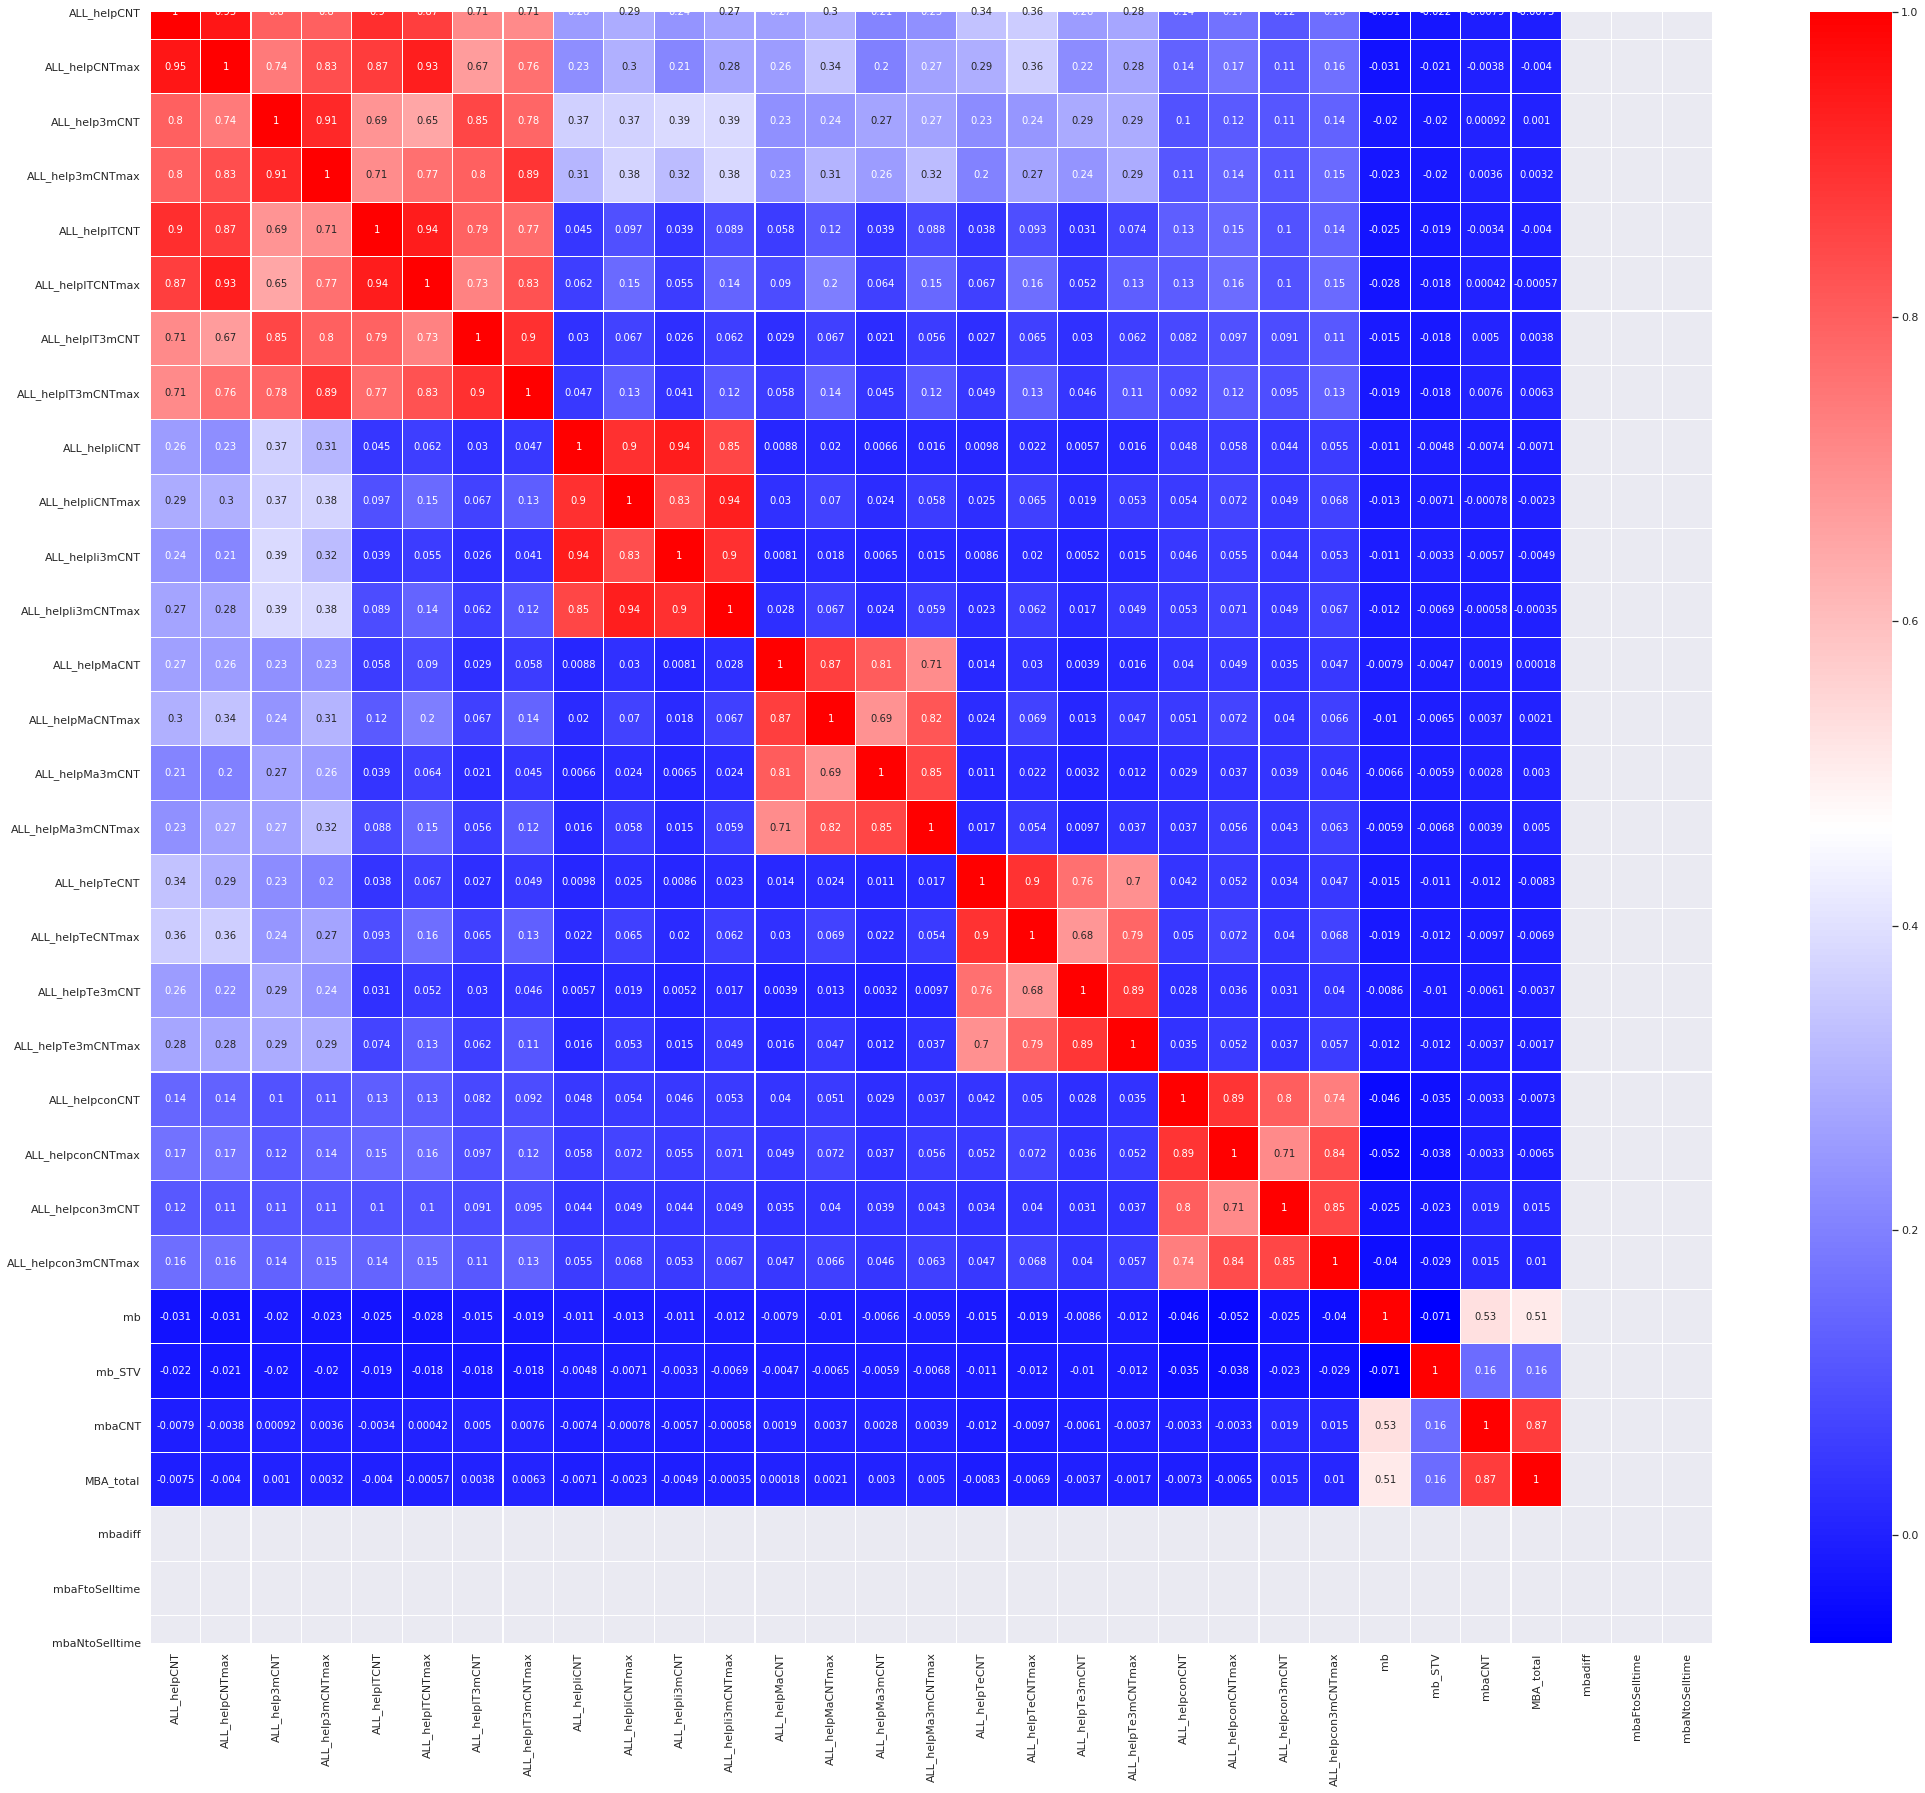

In [51]:
plt.figure(figsize=(35,30))
sns.heatmap(df_plt_ALLhelp.corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

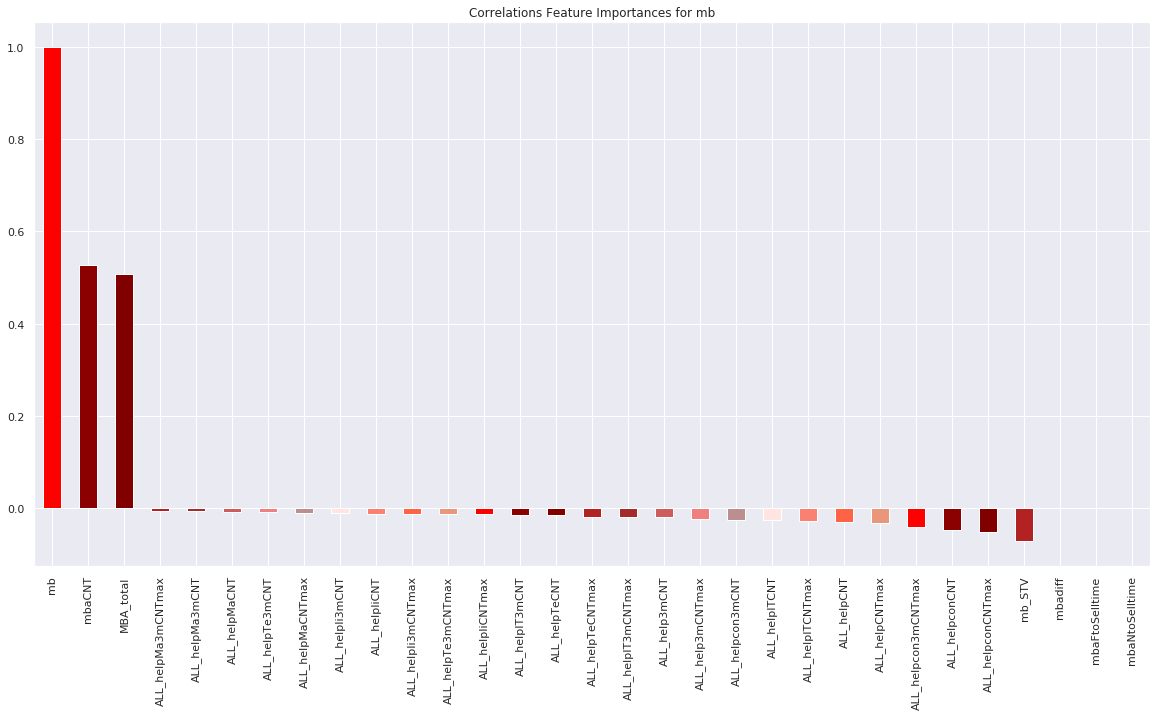

In [52]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_plt_ALLhelp.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [53]:
df_test = df_all[['helpCNT',
       'helpCNTmax', 'help3mCNT', 'help3mCNTmax', 'helpITCNT', 'helpITCNTmax',
       'helpIT3mCNT', 'helpIT3mCNTmax', 'helpIiCNT', 'helpIiCNTmax',
       'helpIi3mCNT', 'helpIi3mCNTmax', 'helpMaCNT', 'helpMaCNTmax',
       'helpMa3mCNT', 'helpMa3mCNTmax', 'helpTeCNT', 'helpTeCNTmax',
       'helpTe3mCNT', 'helpTe3mCNTmax', 'helpconCNT', 'helpconCNTmax',
       'helpcon3mCNT', 'helpcon3mCNTmax',  'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime']]

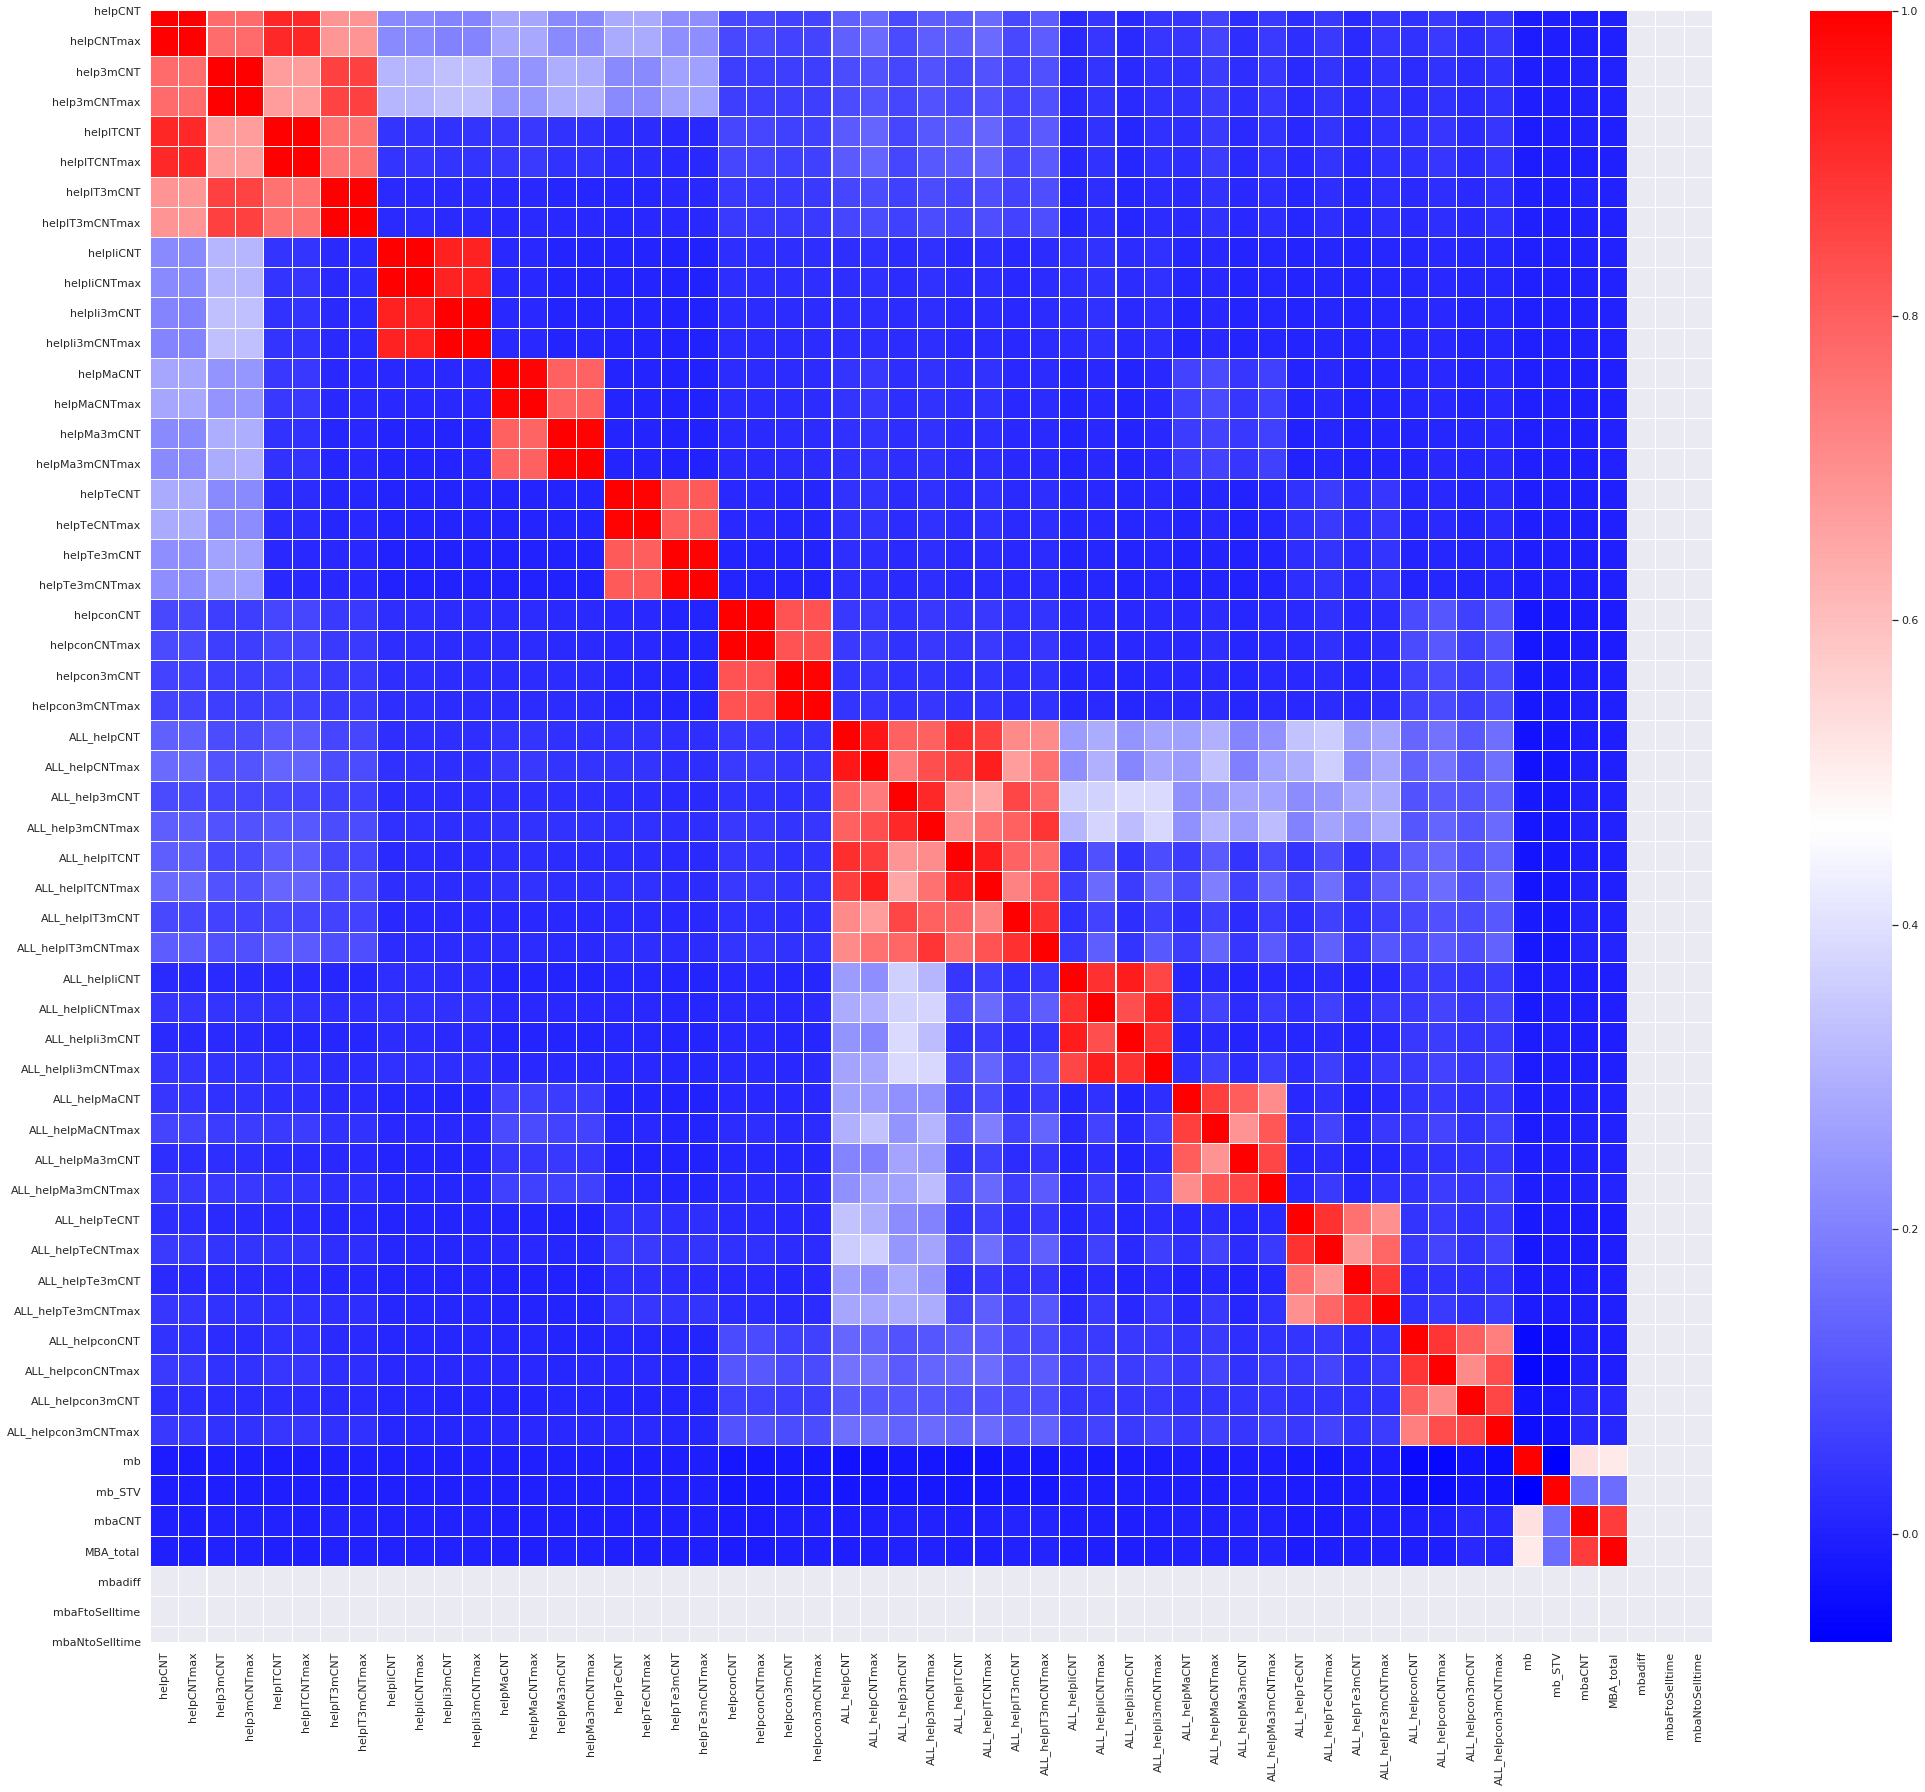

In [54]:
plt.figure(figsize=(35,30))
sns.heatmap(df_test.corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

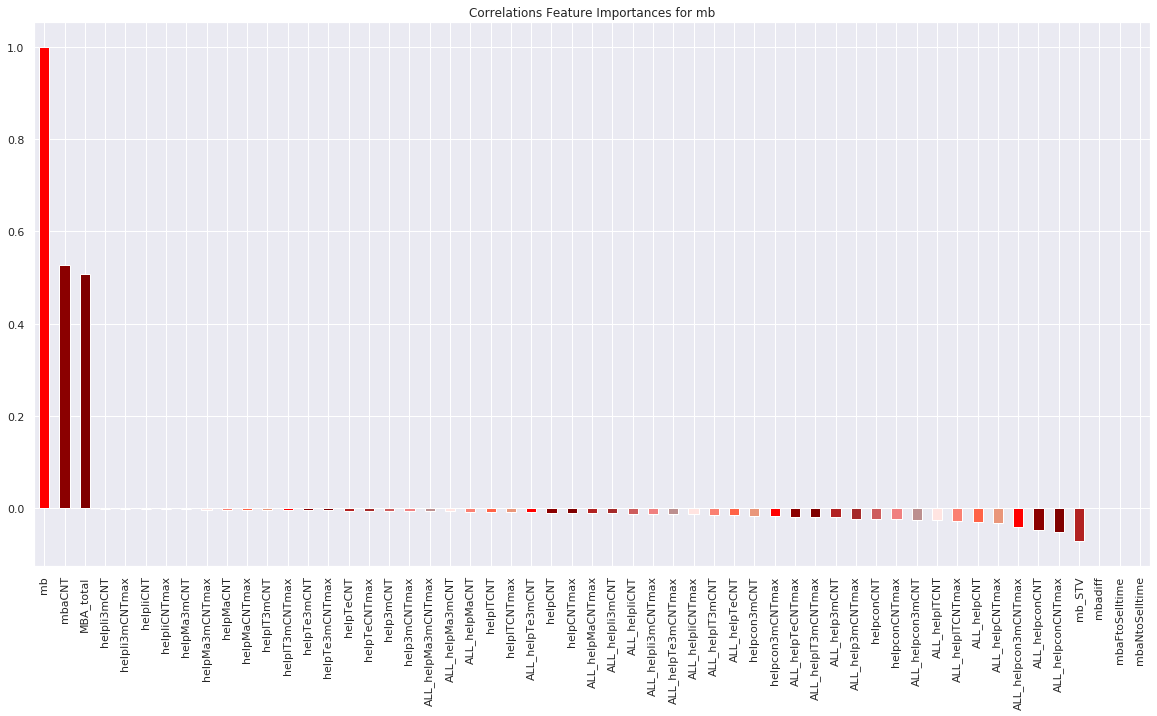

In [55]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_test.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [56]:
'''df_testt = df_all[['ALL_helpCNT','ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax', 'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',
       'mbaFtoSelltime', 'mbaNtoSelltime']]'''

"df_testt = df_all[['ALL_helpCNT','ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',\n       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',\n       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',\n       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',\n       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',\n       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',\n       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',\n       'ALL_helpcon3mCNTmax', 'mb', 'mb_STV', 'mbaCNT', 'MBA_total', 'mbadiff',\n       'mbaFtoSelltime', 'mbaNtoSelltime']]"

In [58]:
df_all[df_all['helpITCNT']!=0.0][['helpITCNT','helpIT3mCNT','ALL_helpITCNT','ALL_helpITCNTmax','ALL_helpIT3mCNT','ALL_helpIT3mCNTmax']].head(30)

,helpITCNT,helpIT3mCNT,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax
147,2.0,1.0,0.000000,0.0,0.000000,0.0
618,1.0,0.0,1.000000,1.0,0.000000,0.0
639,1.0,0.0,1.666666,6.0,0.333333,2.0
673,1.0,0.0,1.500000,2.0,0.250000,1.0
781,3.0,2.0,0.000000,0.0,0.000000,0.0
1146,1.0,0.0,1.000000,1.0,0.000000,0.0
1385,1.0,1.0,0.000000,0.0,0.000000,0.0
1462,2.0,0.0,1.250000,3.0,0.125000,1.0
1463,4.0,3.0,0.000000,0.0,0.000000,0.0
1924,1.0,0.0,1.400000,3.0,1.100000,3.0


# Modeling

In [60]:
#import platform; print(platform.platform())
#import sys; print("Python", sys.version)
#import numpy; print("NumPy", numpy.__version__)
#import scipy; print("SciPy", scipy.__version__)
#import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-7-6.1.7601-SP1
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
NumPy 1.16.5
SciPy 1.3.1
Scikit-Learn 0.22.1


y: mb , X:其他

In [64]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df_ML)
df_scale = pd.DataFrame(df_scale, columns = df_ML.columns)'''

Anomaly Detection on going

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
'''from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
 eps = .2, 
 metric='euclidean', 
 min_samples = 100,
 n_jobs = -1)
clusters = outlier_detection.fit_predict(df_ML)'''

In [ ]:
'''from matplotlib import cm
cmap = cm.get_cmap('Set1')
num.plot.scatter(x='Spend_Score',y='mb', c=clusters, cmap=cmap,colorbar = False)'''

X,y

In [198]:
y = df_ML['mb']
X = df_ML.drop(['mb'],axis=1)

拆分驗證(X_val,y_val)和訓練+測試(X_tt,y_tt)

In [199]:
from sklearn.model_selection import train_test_split
X_tt,X_val,y_tt,y_val = train_test_split(X,y,test_size = 0.3,random_state=42)

In [214]:
y_tt.value_counts()

0    548717
1     41565
Name: mb, dtype: int64

In [215]:
y_val.value_counts()

0    235112
1     17867
Name: mb, dtype: int64

## SMOTE做法

Step1 : SMOTE ; Step2: 訓練(X_train,y_train)測試(X_test,y_test)拆分

In [203]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

Using TensorFlow backend.


In [206]:
X_res,y_res = sm.fit_resample(X_tt,y_tt)

In [216]:
y_res.value_counts()

1    548717
0    548717
Name: mb, dtype: int64

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state=43)

In [212]:
y_train.value_counts()

1    439336
0    438611
Name: mb, dtype: int64

In [213]:
y_test.value_counts()

0    110106
1    109381
Name: mb, dtype: int64